### 1. Implement the game of life sequentially

### 4. Run the game with the "Gosper's glider gun" initial condition

### 5. Model at least two more initial conditions

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Две функции которые за все отвечают
def logic_and_plotting(field):
    n_of_the_living_cells, time = [],[]
    list_to_gif = []
    for number_of_iter in range(200):
        n_of_the_living_cells.append(sum(sum(field)))
        time.append(number_of_iter)
        list_to_gif.append(field)
        print(number_of_iter)
        plt.imshow(field,cmap='gray')
        plt.show()

        blank = np.zeros((field.shape[0], field.shape[1]))

        for i in range(0, field.shape[0]-1):
            for j in range(0, field.shape[1]-1):
                ##check 8 neigbors without borders 
                blank = change_the_pos(i,j,field,blank)


        #bottom right corner
        for i in range(field.shape[0]-1, field.shape[0]):
            for j in range(field.shape[1]-1, field.shape[1]):
                blank = change_the_pos(-1,-1,field,blank)

        #bottom
        for i in range(field.shape[0]-1, field.shape[0]):
            for j in range(0, field.shape[1]-1):
                blank = change_the_pos(-1,j,field,blank)

        #right
        for j in range(field.shape[1]-1, field.shape[1]):
            for i in range(0, field.shape[0]-1):
#                 print(i,j)
                blank = change_the_pos(i,-1,field,blank)


        field = blank.copy()
    
    return n_of_the_living_cells, time, list_to_gif


def change_the_pos(i,j,field,blank):
    array_of_neigbors = np.array([field[i-1,j], field[i-1,j-1], field[i-1,j+1], field[i+1,j], field[i+1,j-1], 
                             field[i+1,j+1], field[i,j-1], field[i,j+1]])
    
    sum_of_neigbors = sum(array_of_neigbors)
    
    if field[i,j] == 1:
        ##Любая живая клетка с менее чем двумя живыми соседями умирает, как если бы она была недостаточной
        ##Любая живая клетка с более чем тремя живыми соседями умирает, как будто от перенаселения
        if sum_of_neigbors < 2 or sum_of_neigbors > 3:
            blank[i,j] = 0

        ##Любая живая клетка с двумя или тремя живыми соседями доживает до следующего поколения
        elif sum_of_neigbors == 2 or sum_of_neigbors == 3:
            blank[i,j] = 1

    ##Любая мертвая клетка с ровно тремя живыми соседями становится живой клеткой, 
    #как бы в результате размножения
    if field[i,j] == 0 and sum_of_neigbors == 3:
        blank[i,j] = 1
        
    return blank.copy()
        

        
        
## Те же самые функции, но для цветного. Не хочу добавлять много ифов в функции выше
## Две функции которые за все отвечают
def logic_and_plotting_color(field):
    list_to_gif_color = []
    n_of_the_living_cells_color, time_color = [],[]
    for number_of_iter in range(200):
        n_of_the_living_cells_color.append(sum(sum(sum(field !=0)))//3)
        time_color.append(number_of_iter)
        list_to_gif_color.append(field)
        print(number_of_iter)
        plt.imshow(field)
        plt.show()

        blank = np.zeros((field.shape[0], field.shape[1], 3))

        for i in range(0, field.shape[0]-1):
            for j in range(0, field.shape[1]-1):
                ##check 8 neigbors without borders 
                change_the_pos_color(i,j,field,blank)


        #bottom right corner
        change_the_pos_color(-1,-1,field,blank)

        #bottom
        for i in range(field.shape[0]-1, field.shape[0]):
            for j in range(0, field.shape[1]-1):
                change_the_pos_color(-1,j,field,blank)

        #right
        for j in range(field.shape[1]-1, field.shape[1]):
            for i in range(0, field.shape[0]-1):
                change_the_pos_color(i,-1,field,blank)
        
        blank = np.uint8(blank)

        field = blank.copy()
        
    return n_of_the_living_cells_color, time_color, list_to_gif_color


def change_the_pos_color(i,j,field,blank):
    array_of_neigbors = np.array([field[i-1,j], field[i-1,j-1], field[i-1,j+1], field[i+1,j], field[i+1,j-1], 
                             field[i+1,j+1], field[i,j-1], field[i,j+1]])
    
    
    sum_of_neigbors = sum(sum(array_of_neigbors != 0))//3
#     print(sum_of_neigbors)

#     print(blank[5,5])
    
    if sum(field[i,j]) != 0:
        ##Любая живая клетка с менее чем двумя живыми соседями умирает, как если бы она была недостаточной
        ##Любая живая клетка с более чем тремя живыми соседями умирает, как будто от перенаселения
        if sum_of_neigbors < 2 or sum_of_neigbors > 3:
            pass

        ##Любая живая клетка с двумя или тремя живыми соседями доживает до следующего поколения
        elif sum_of_neigbors == 2 or sum_of_neigbors == 3:
            blank[i,j] = [np.random.randint(1,255),np.random.randint(1,255), np.random.randint(1,255)]

    ##Любая мертвая клетка с ровно тремя живыми соседями становится живой клеткой, 
    #как бы в результате размножения
    if sum(field[i,j]) == 0 and sum_of_neigbors == 3:
        blank[i,j] = [np.random.randint(1,255),np.random.randint(1,255), np.random.randint(1,255)]

0


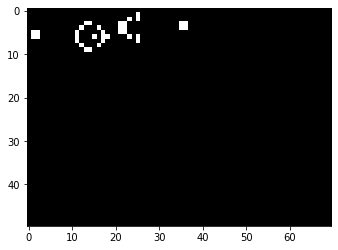

1


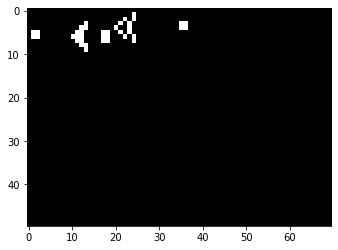

2


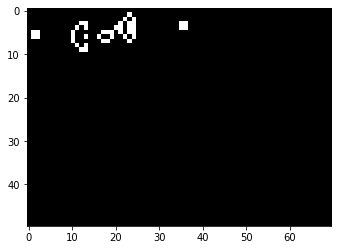

3


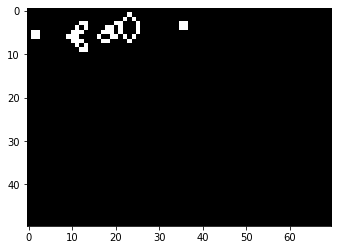

4


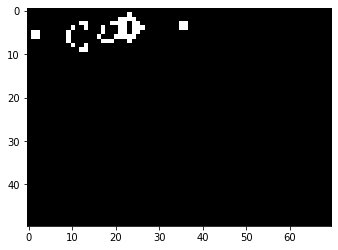

5


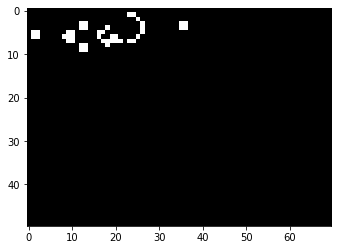

6


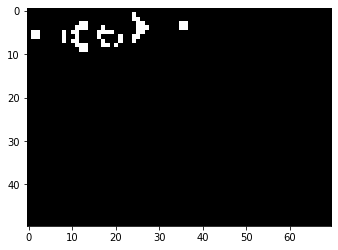

7


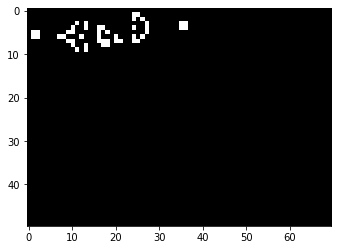

8


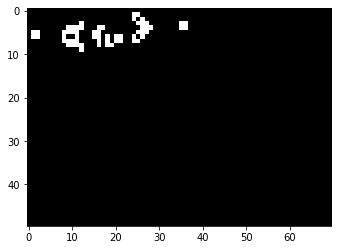

9


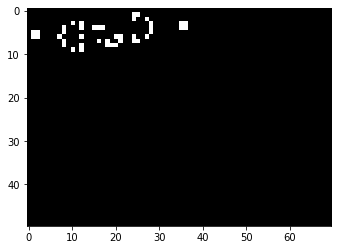

10


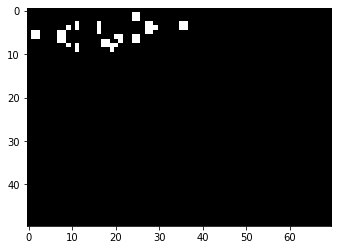

11


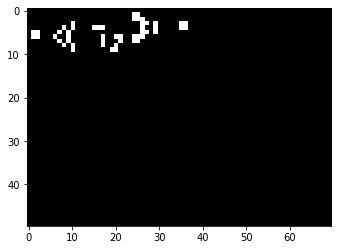

12


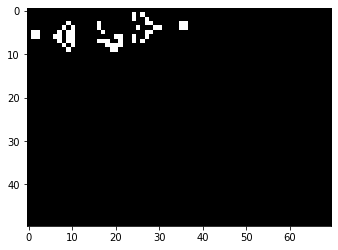

13


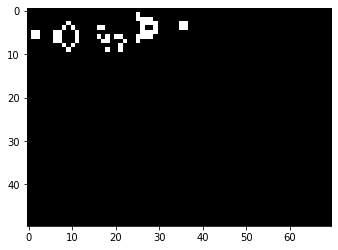

14


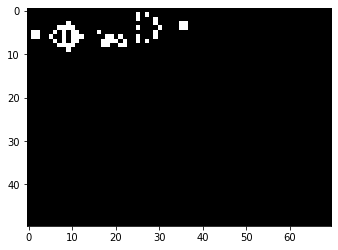

15


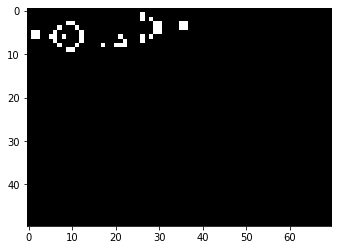

16


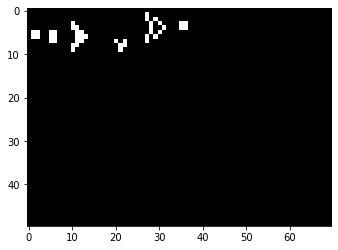

17


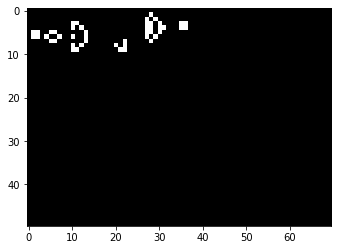

18


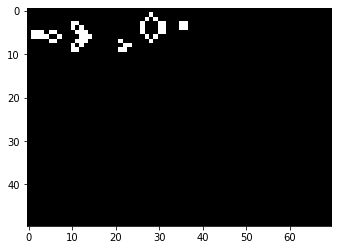

19


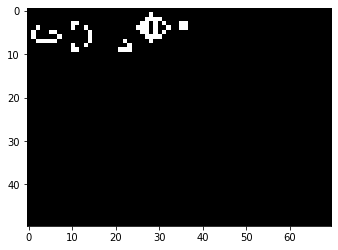

20


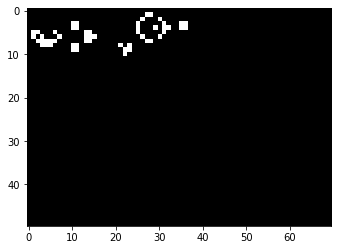

21


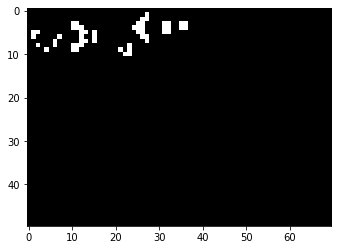

22


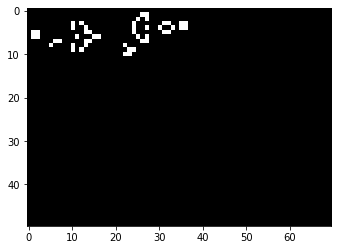

23


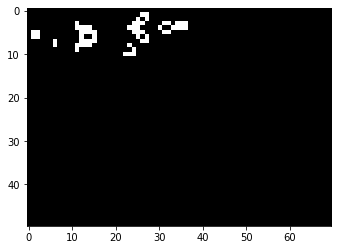

24


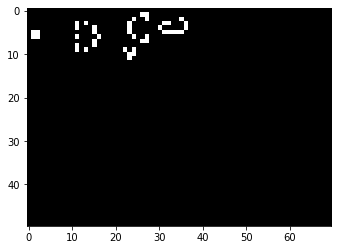

25


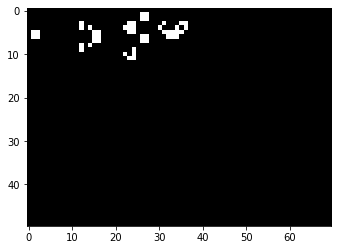

26


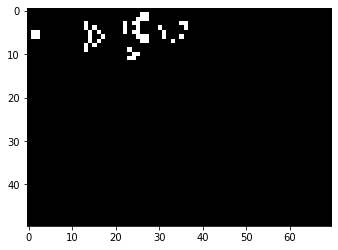

27


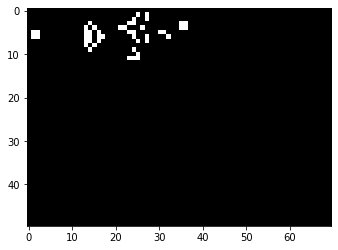

28


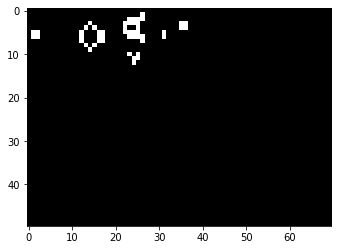

29


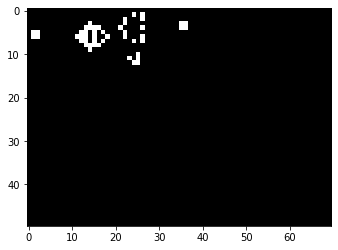

30


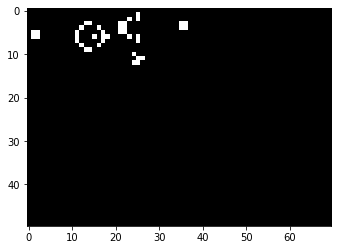

31


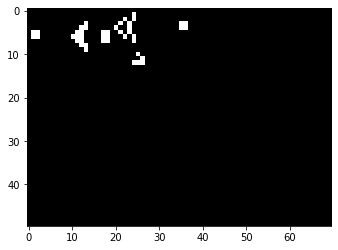

32


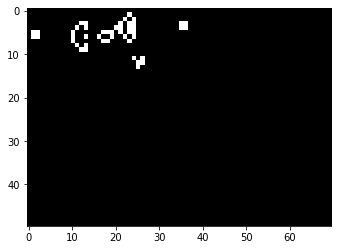

33


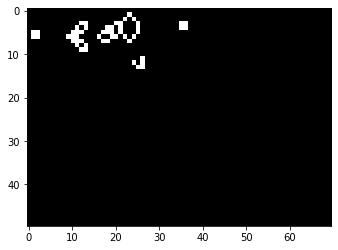

34


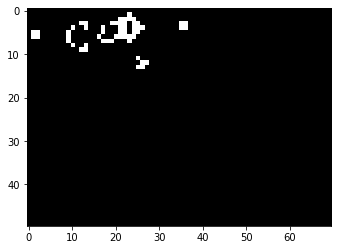

35


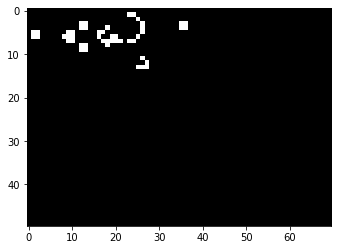

36


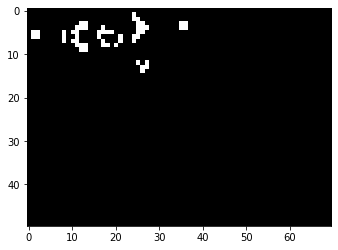

37


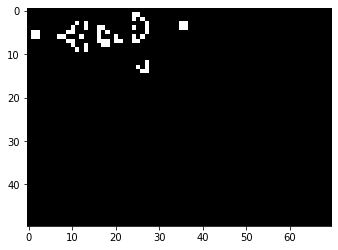

38


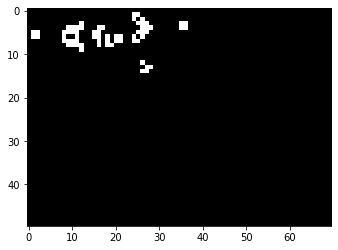

39


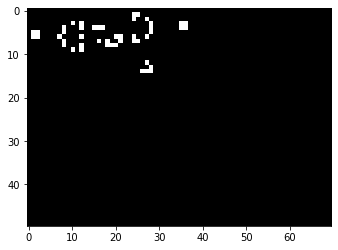

40


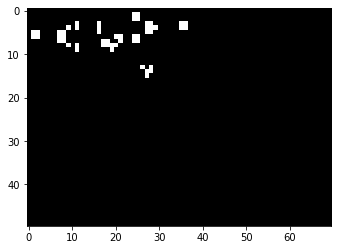

41


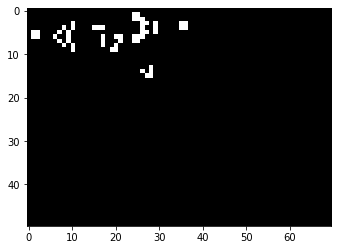

42


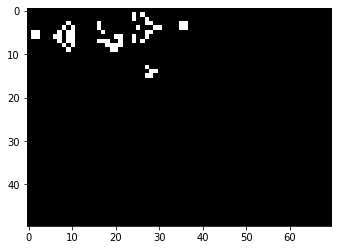

43


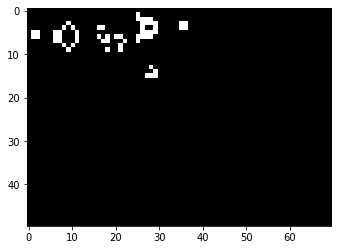

44


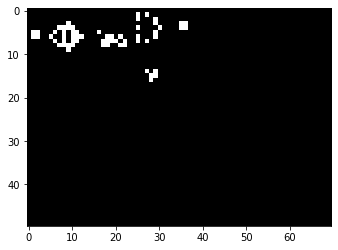

45


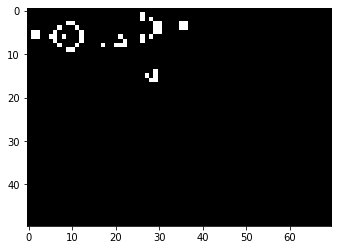

46


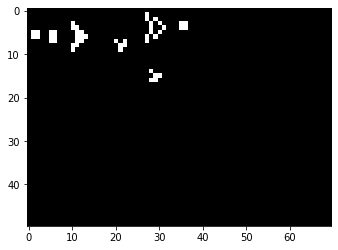

47


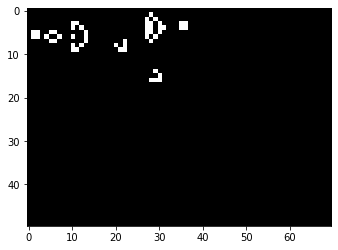

48


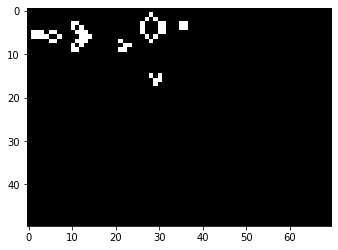

49


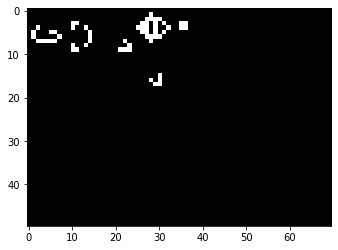

50


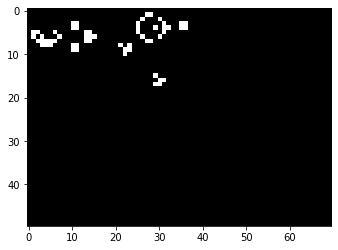

51


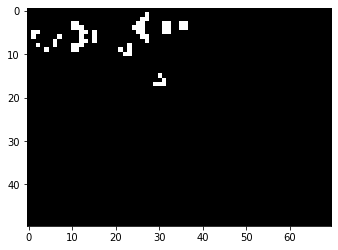

52


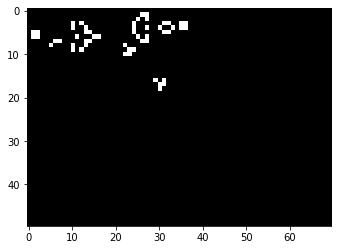

53


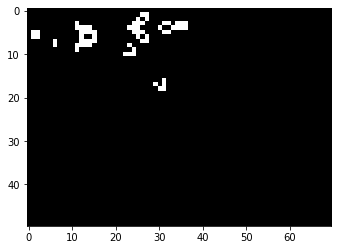

54


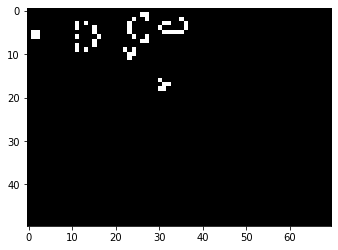

55


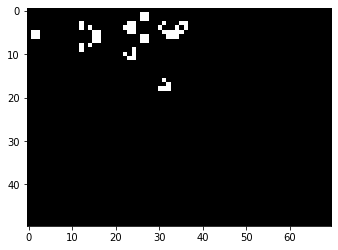

56


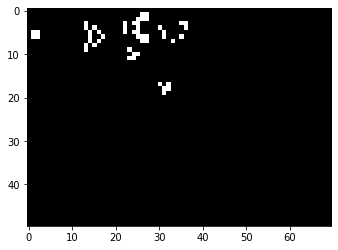

57


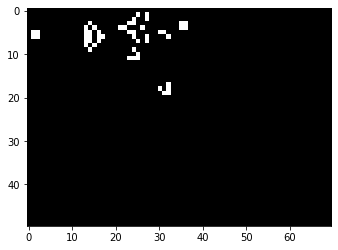

58


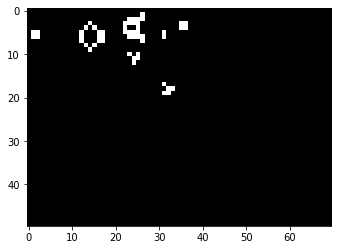

59


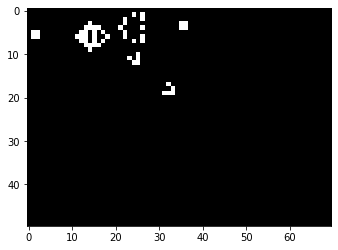

60


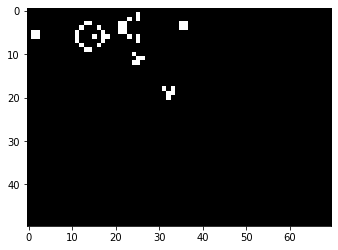

61


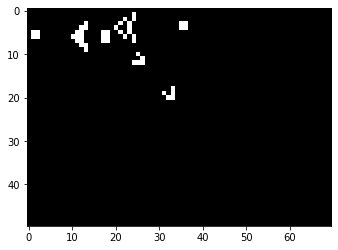

62


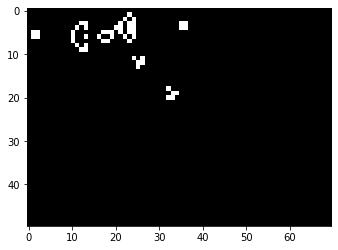

63


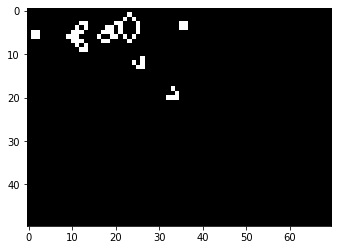

64


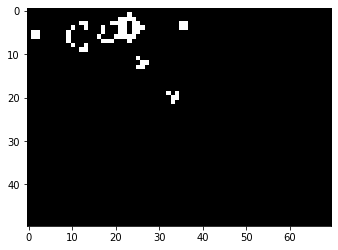

65


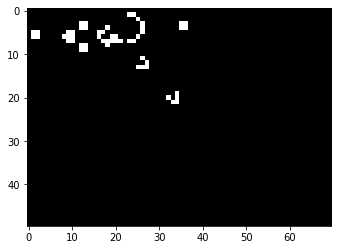

66


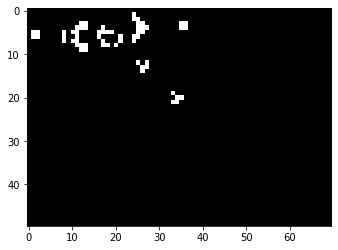

67


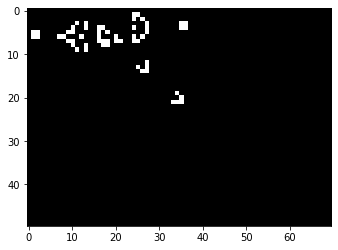

68


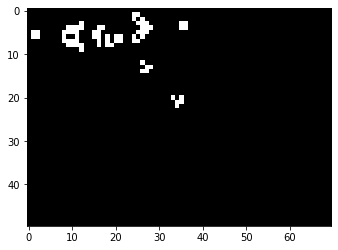

69


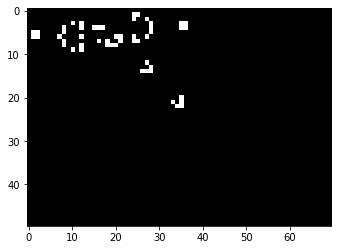

70


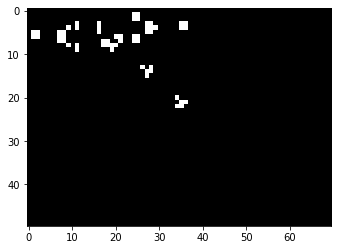

71


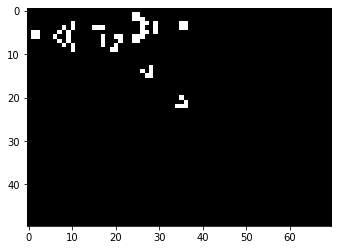

72


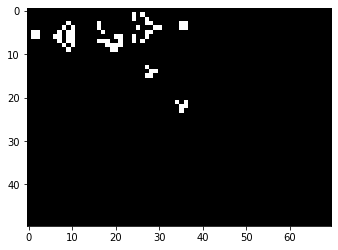

73


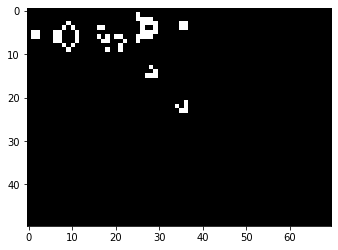

74


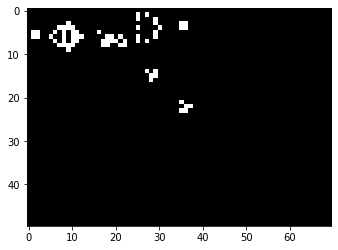

75


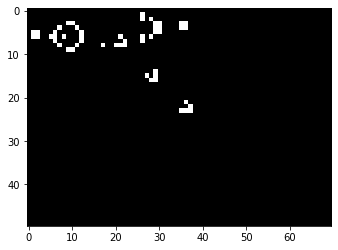

76


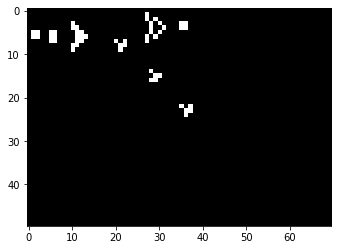

77


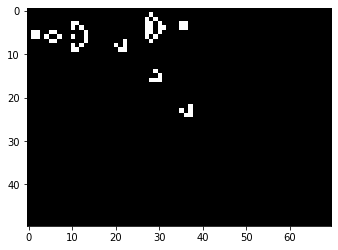

78


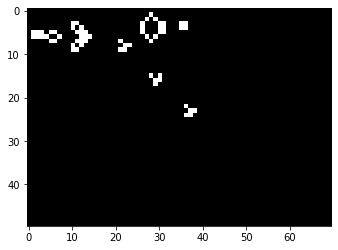

79


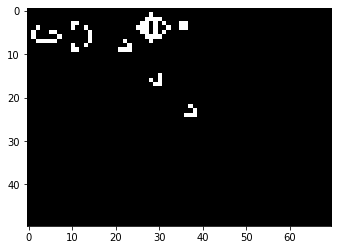

80


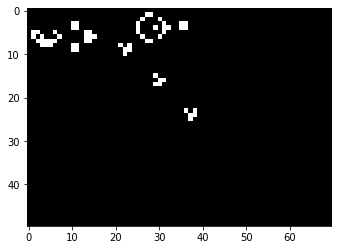

81


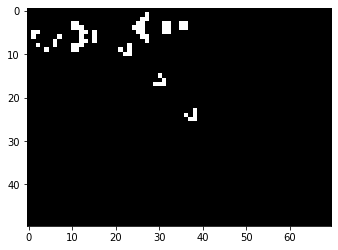

82


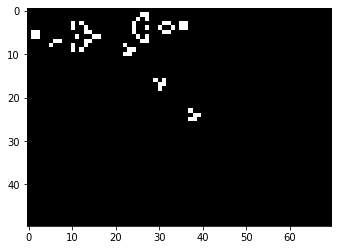

83


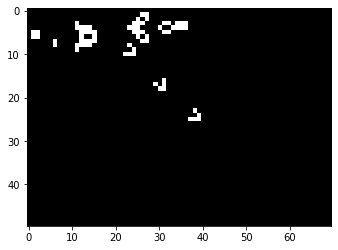

84


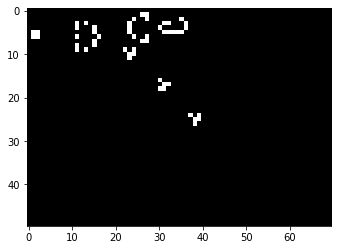

85


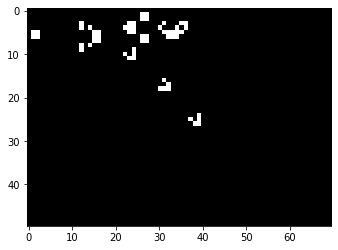

86


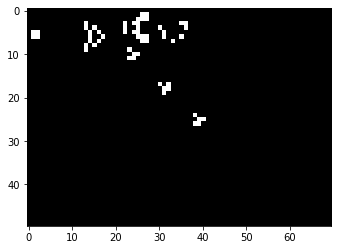

87


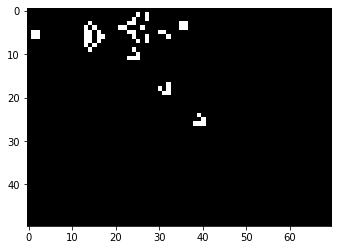

88


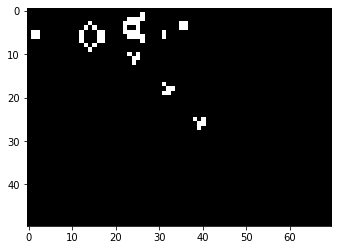

89


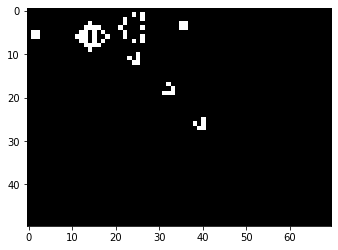

90


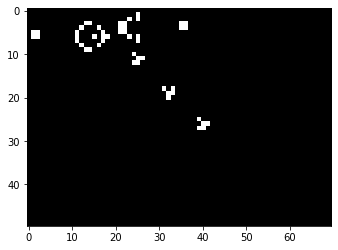

91


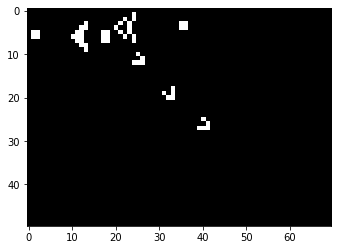

92


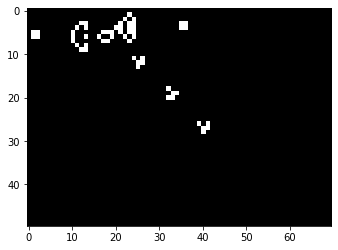

93


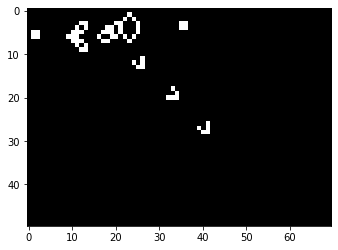

94


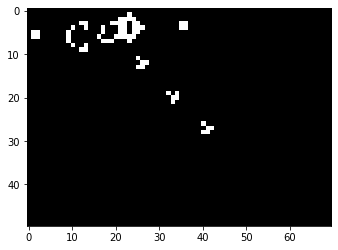

95


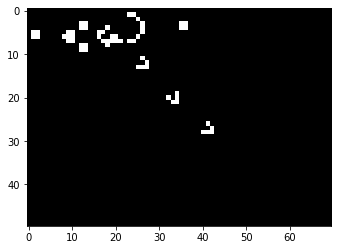

96


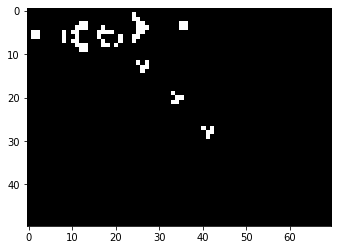

97


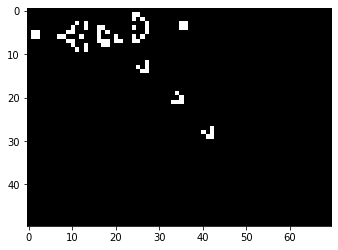

98


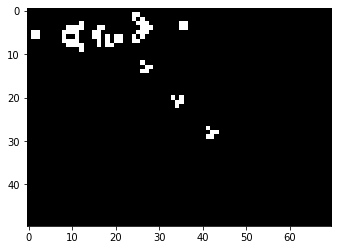

99


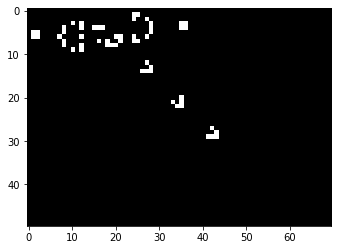

100


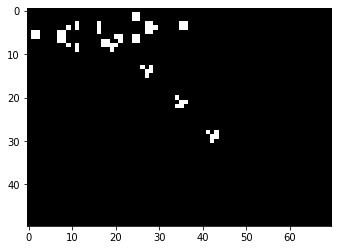

101


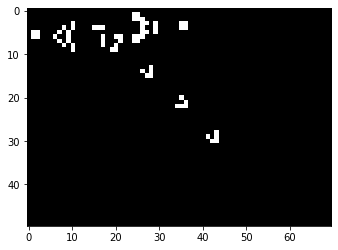

102


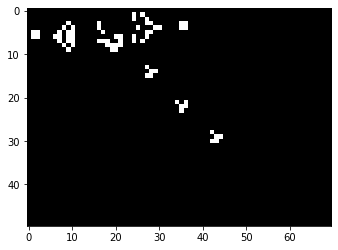

103


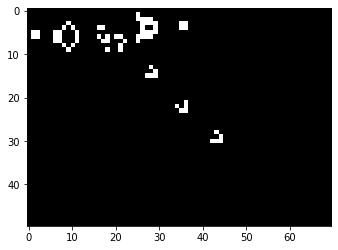

104


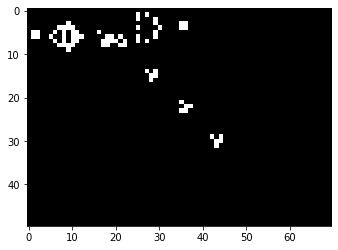

105


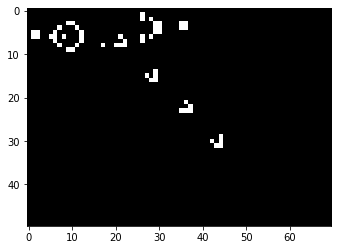

106


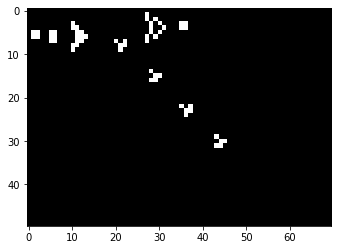

107


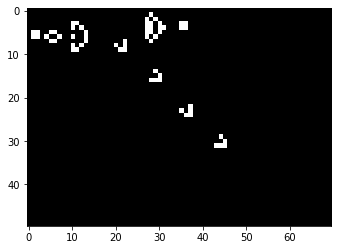

108


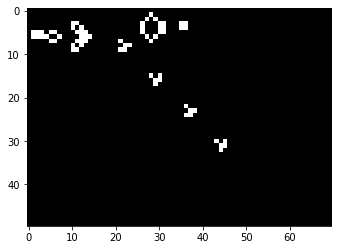

109


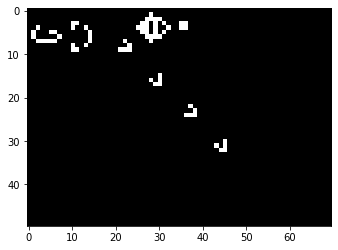

110


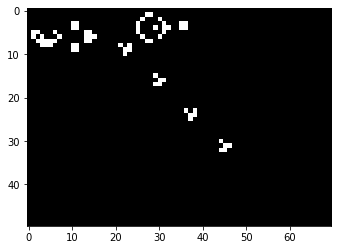

111


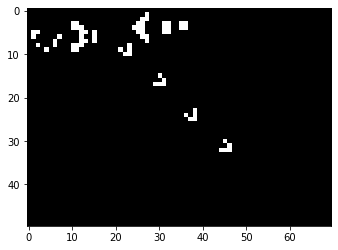

112


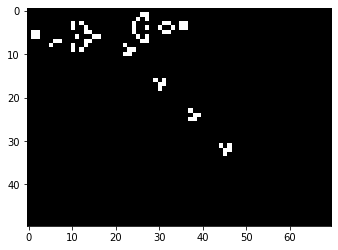

113


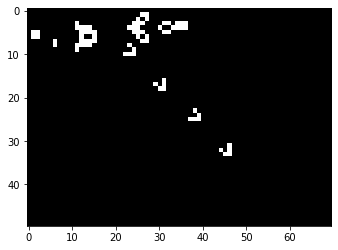

114


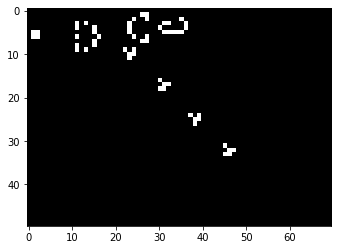

115


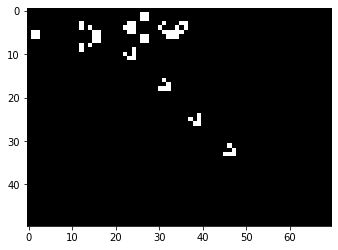

116


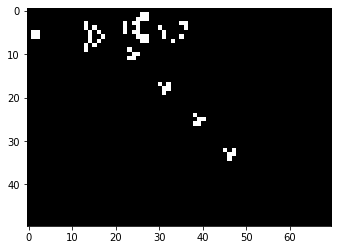

117


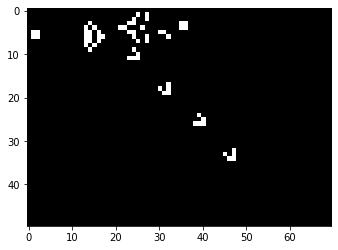

118


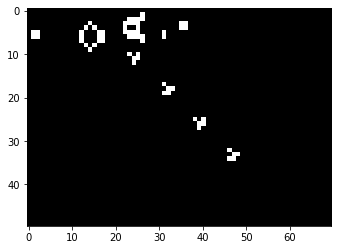

119


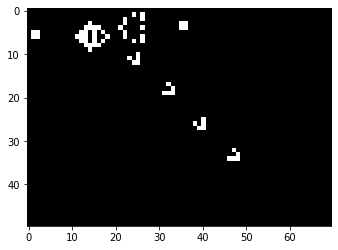

120


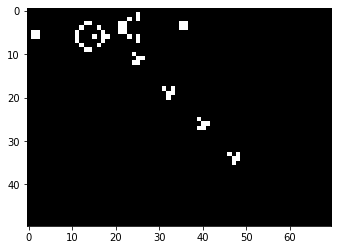

121


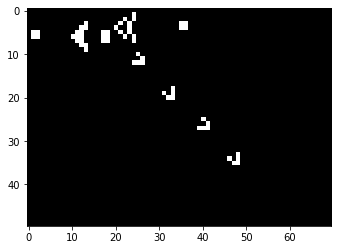

122


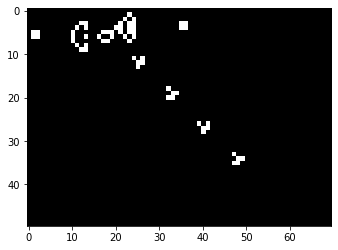

123


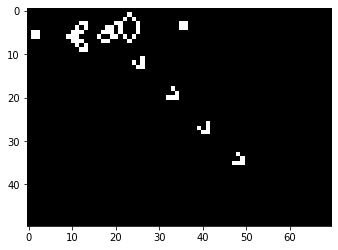

124


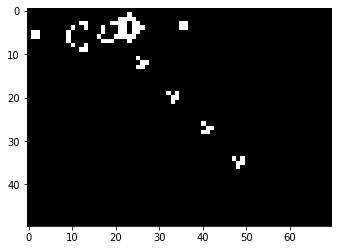

125


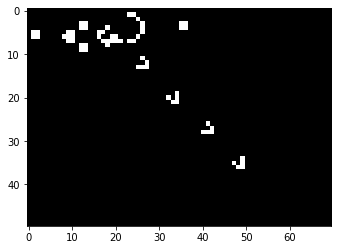

126


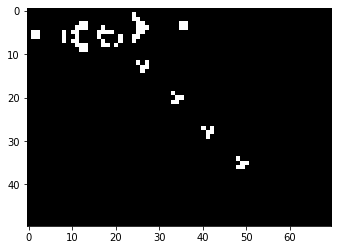

127


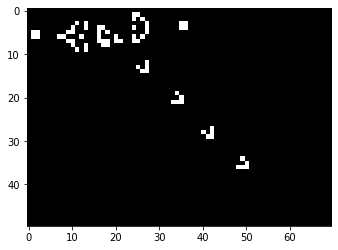

128


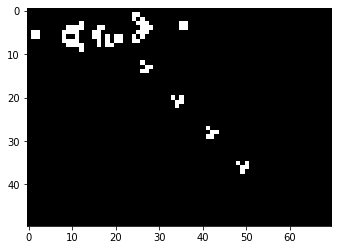

129


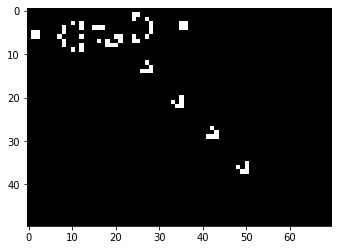

130


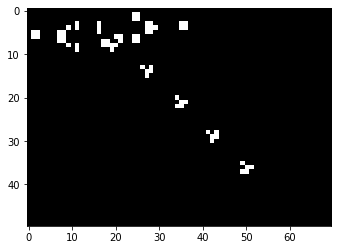

131


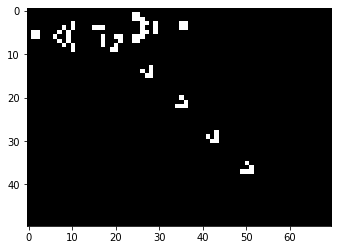

132


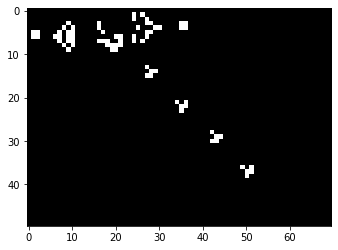

133


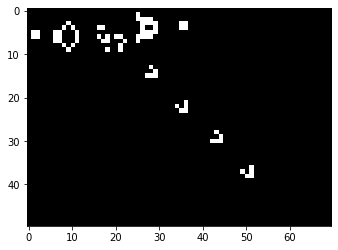

134


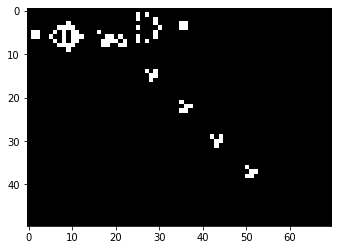

135


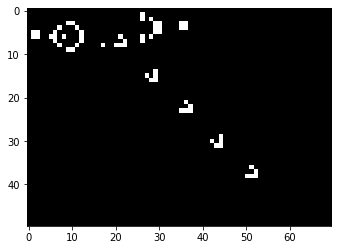

136


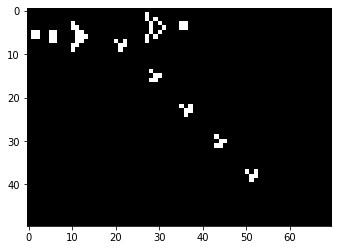

137


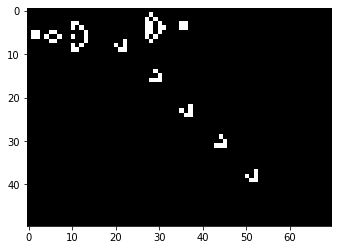

138


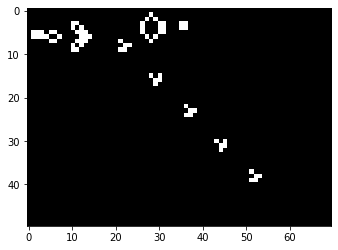

139


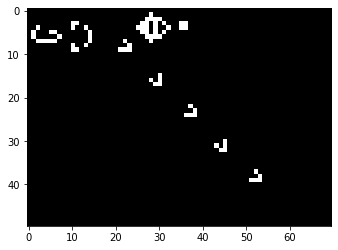

140


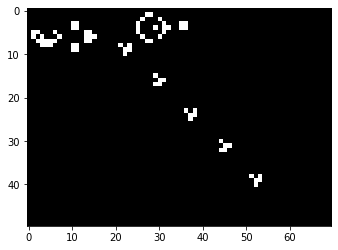

141


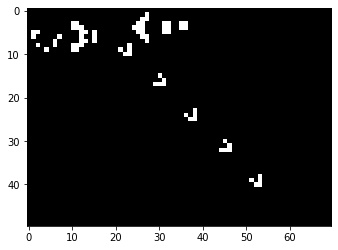

142


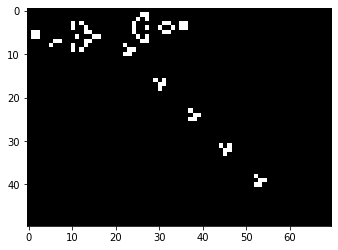

143


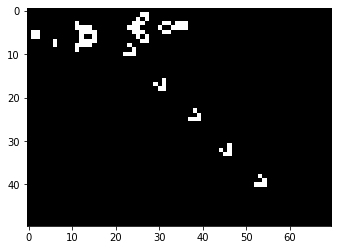

144


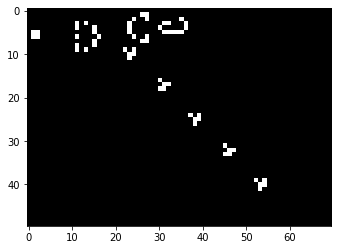

145


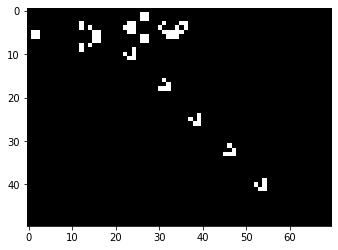

146


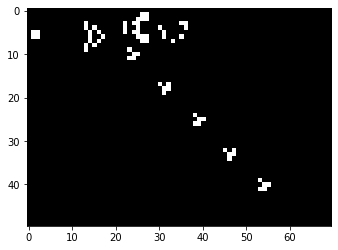

147


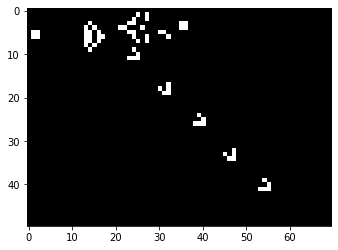

148


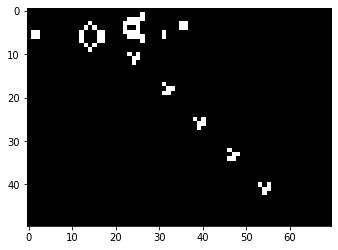

149


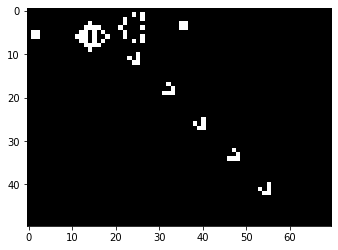

150


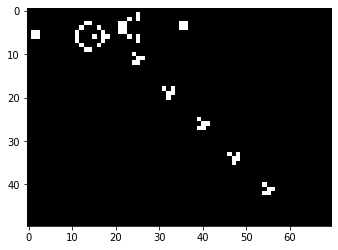

151


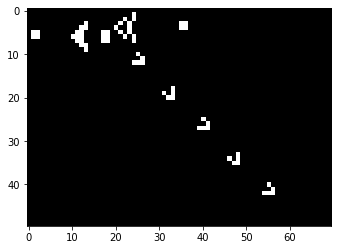

152


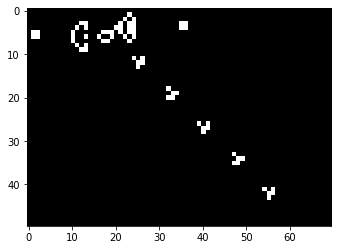

153


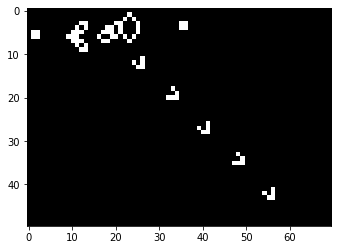

154


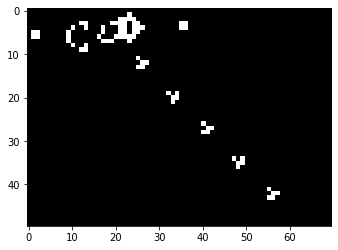

155


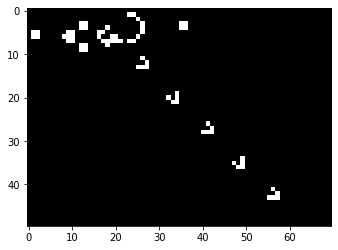

156


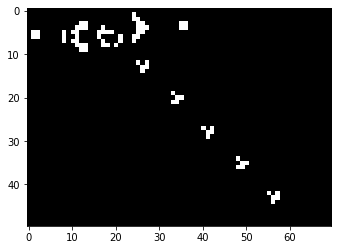

157


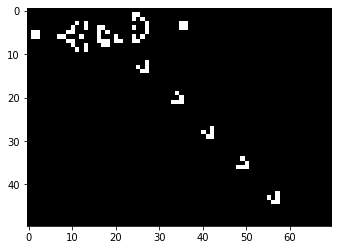

158


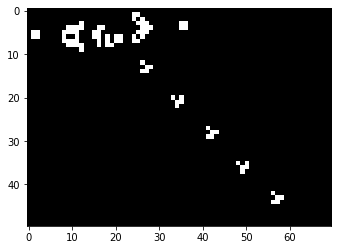

159


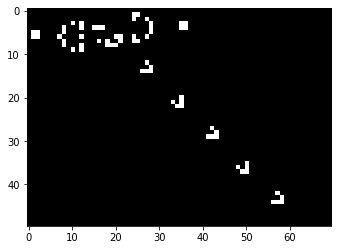

160


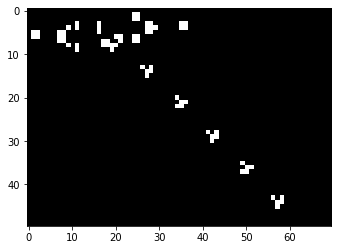

161


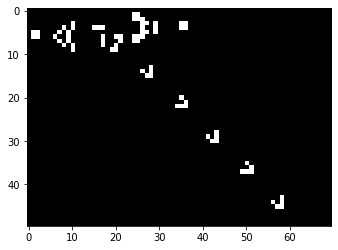

162


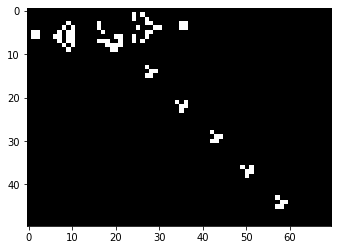

163


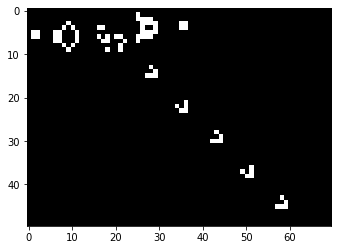

164


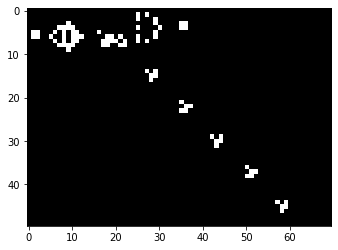

165


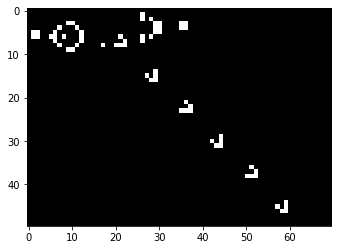

166


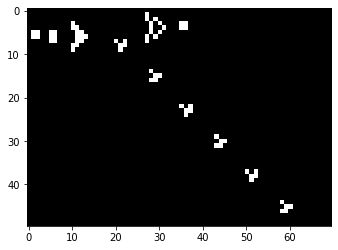

167


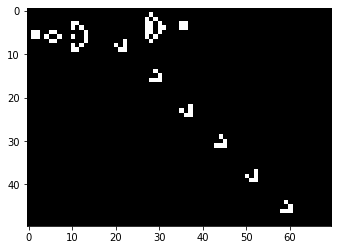

168


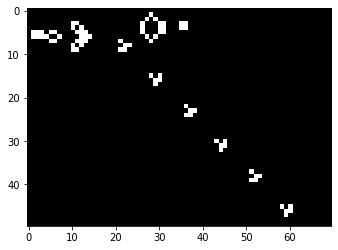

169


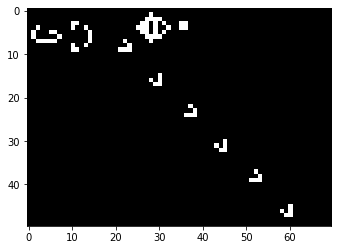

170


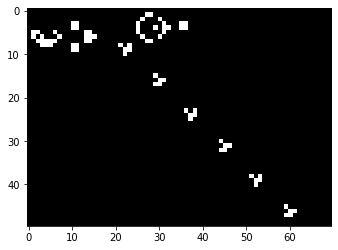

171


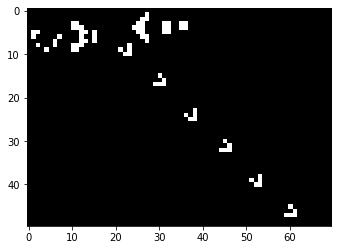

172


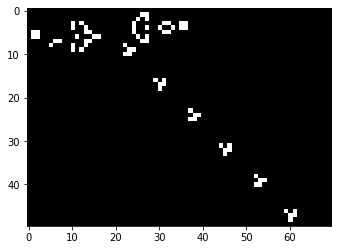

173


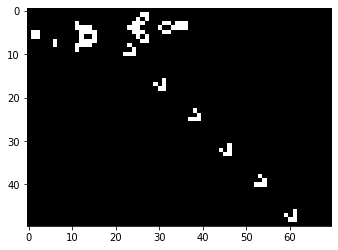

174


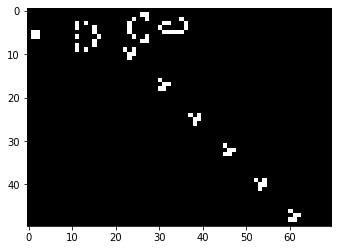

175


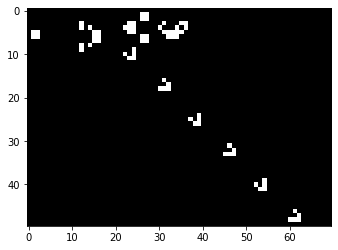

176


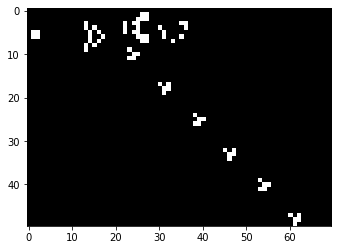

177


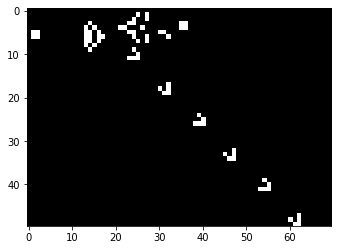

178


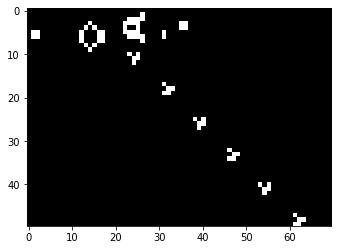

179


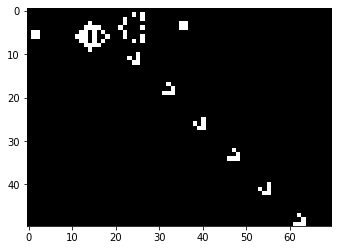

180


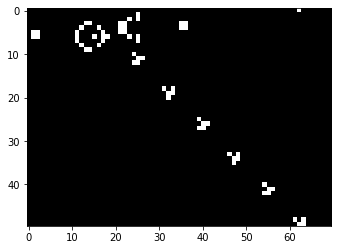

181


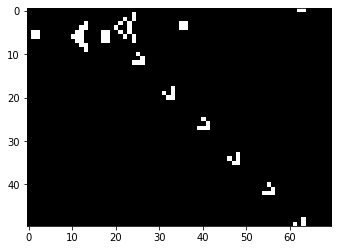

182


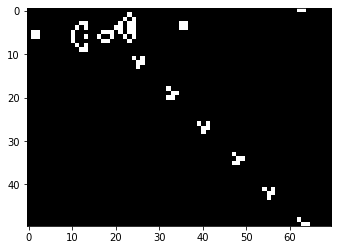

183


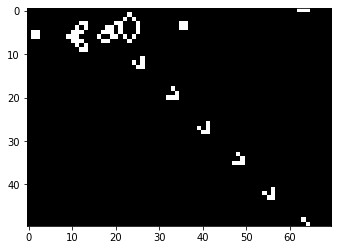

184


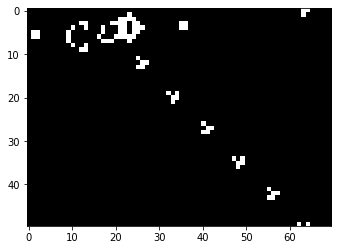

185


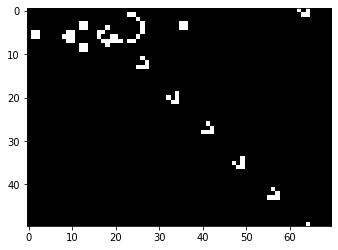

186


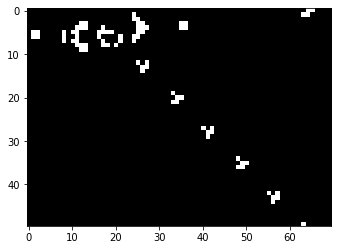

187


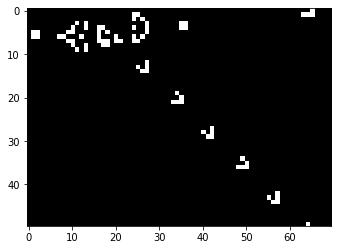

188


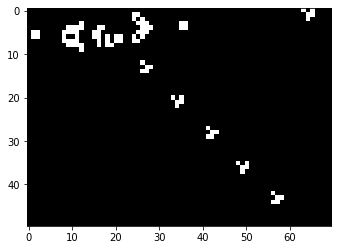

189


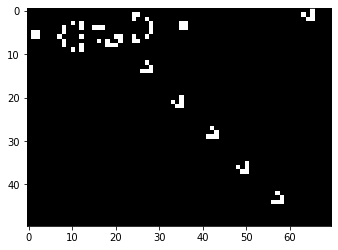

190


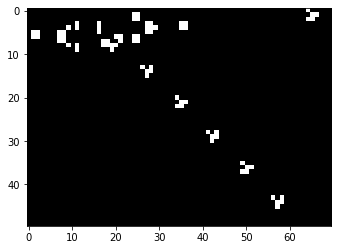

191


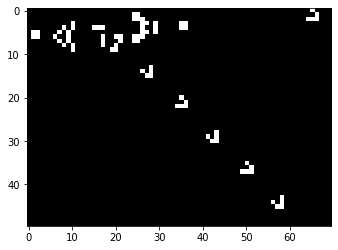

192


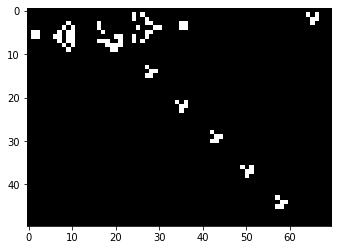

193


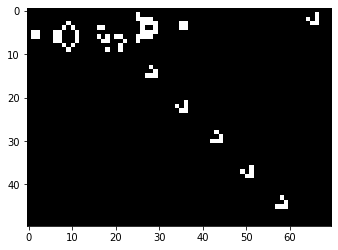

194


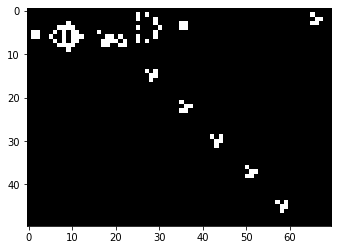

195


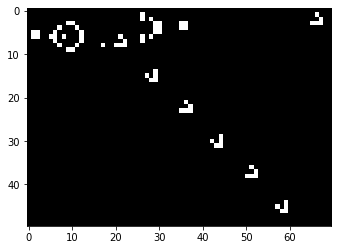

196


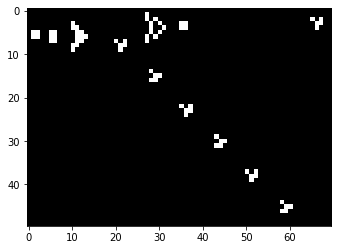

197


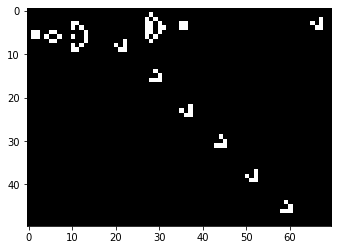

198


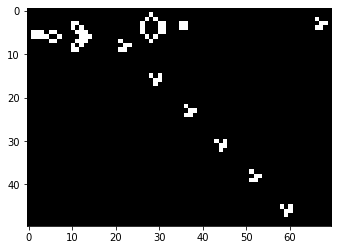

199


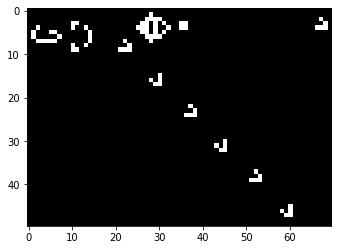

In [2]:
## Gosper's glider gun
# Gosper = np.zeros((11,38), 'int')
# Gosper[5,1], Gosper[6,1], Gosper[5,2], Gosper[6,2] = 1,1,1,1
# Gosper[3,14],Gosper[3,13], Gosper[4,12], Gosper[5,11], Gosper[6,11] = 1,1,1,1,1
# Gosper[7,11],Gosper[8,12],Gosper[9,13],Gosper[9,14] = 1,1,1,1
# Gosper[6,15] = 1
# Gosper[6,18],Gosper[6,17],Gosper[5,17],Gosper[5,17] = 1,1,1,1
# Gosper[4,16],Gosper[7,17],Gosper[8,16] = 1,1,1
# Gosper[5,21],Gosper[4,21],Gosper[3,21],Gosper[5,22],Gosper[6,23],Gosper[4,22],Gosper[3,22],Gosper[2,23] = 1,1,1,1,1,1,1,1
# Gosper[2,25],Gosper[1,25],Gosper[6,25],Gosper[7,25] = 1,1,1,1
# Gosper[3,-3],Gosper[4,-3],Gosper[3,-2],Gosper[4,-2] = 1,1,1,1

glider_gun =\
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

Gosper = np.zeros((50, 70))
Gosper[1:10,1:37] = glider_gun

Gosper_n_of_the_living_cells, Gosper_time, Gosper_list_to_gif = logic_and_plotting(Gosper)

0


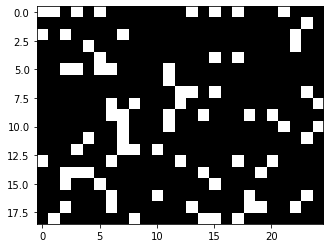

1


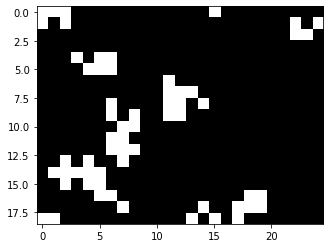

2


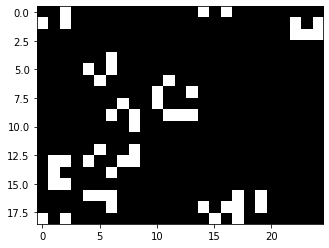

3


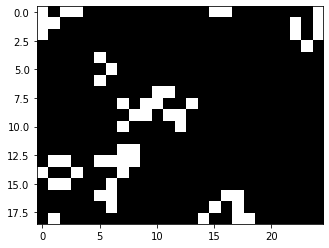

4


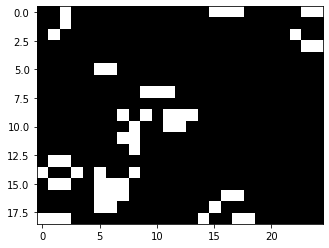

5


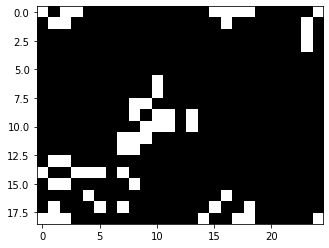

6


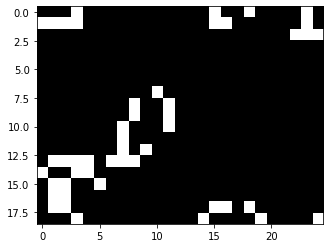

7


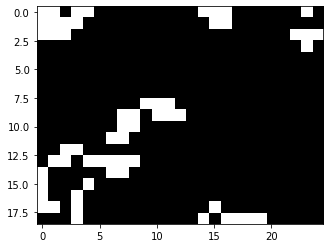

8


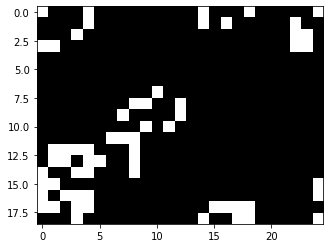

9


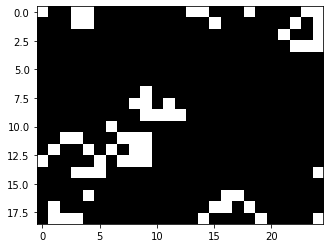

10


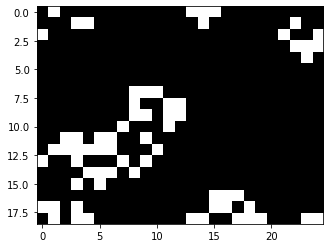

11


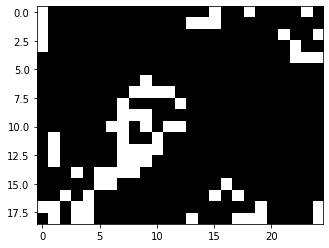

12


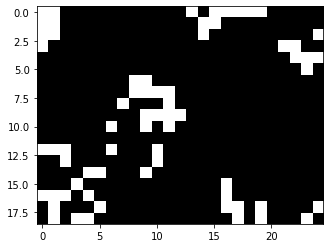

13


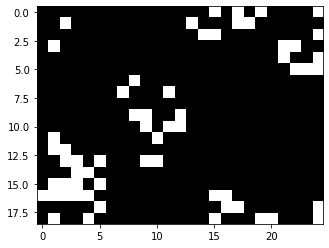

14


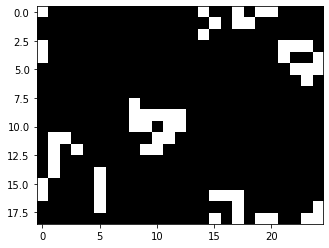

15


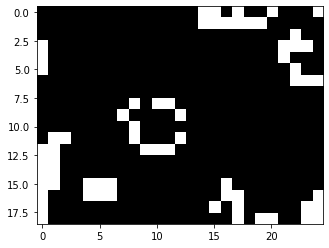

16


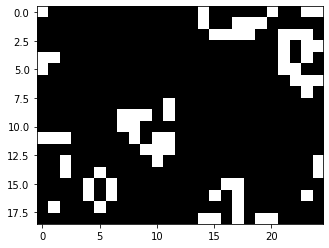

17


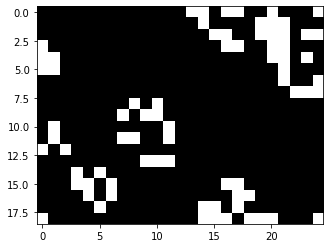

18


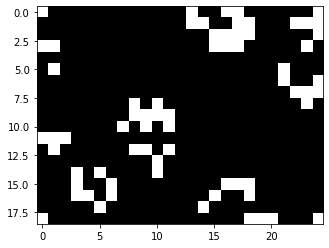

19


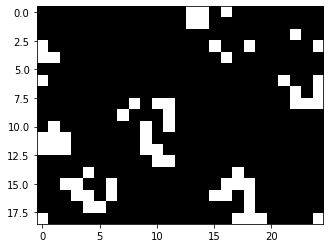

20


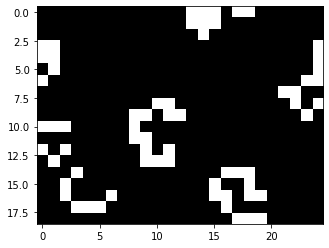

21


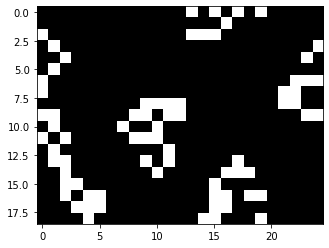

22


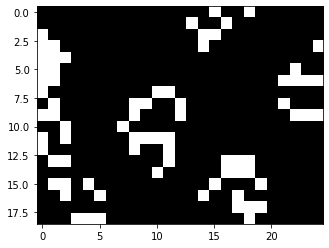

23


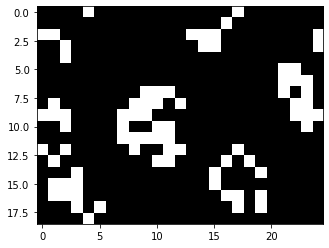

24


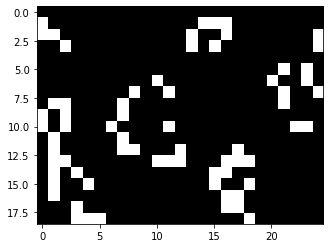

25


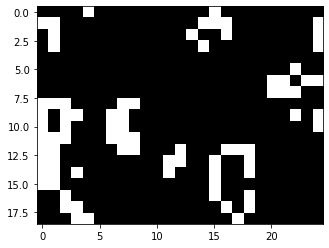

26


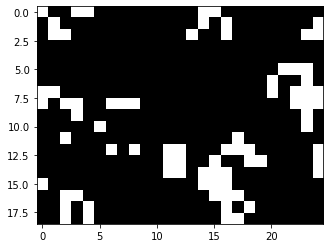

27


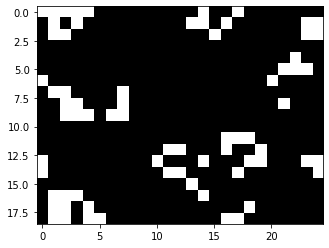

28


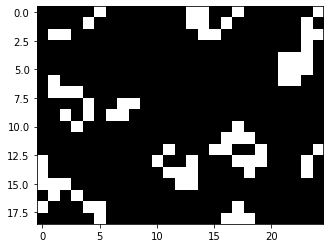

29


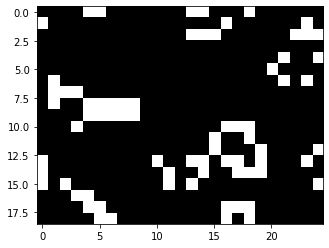

30


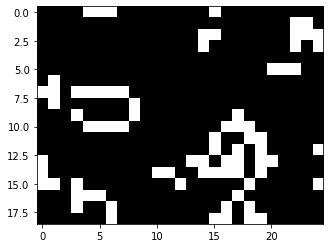

31


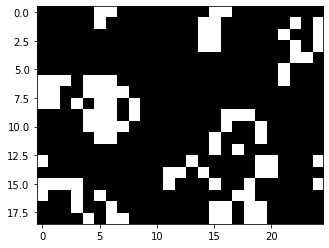

32


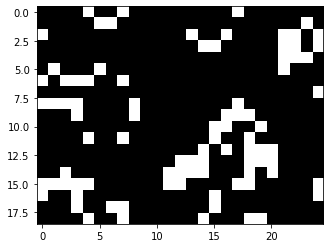

33


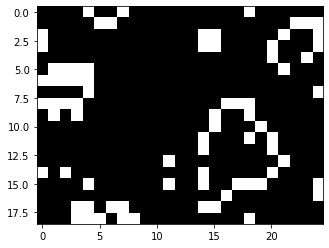

34


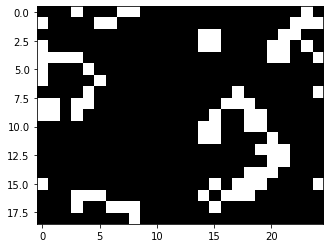

35


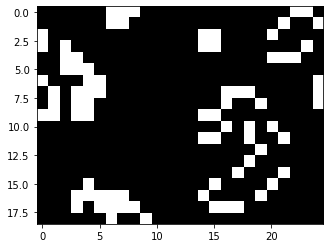

36


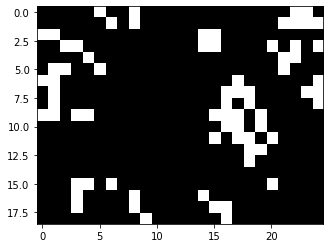

37


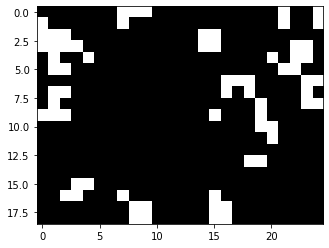

38


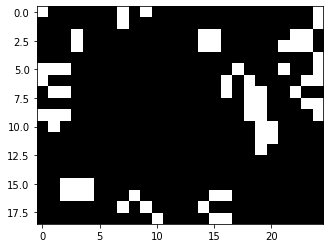

39


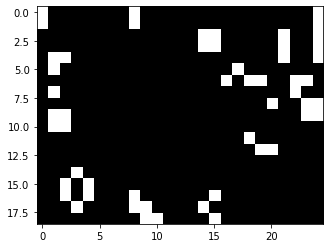

40


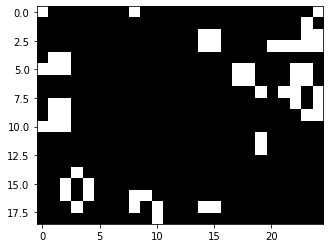

41


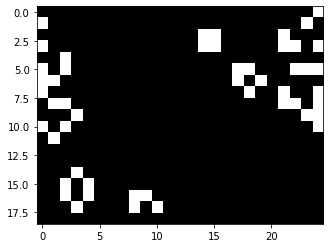

42


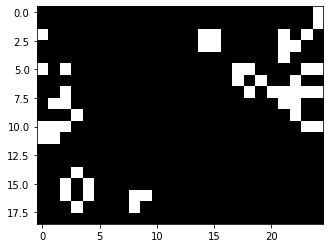

43


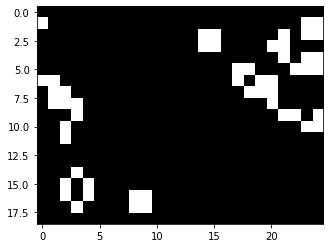

44


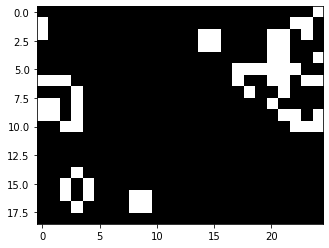

45


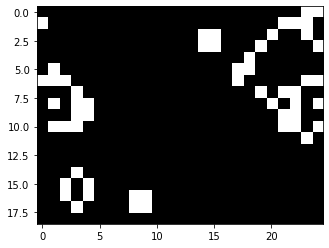

46


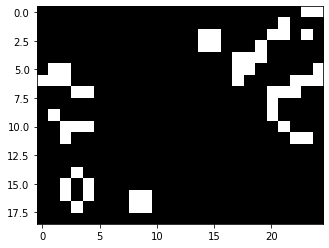

47


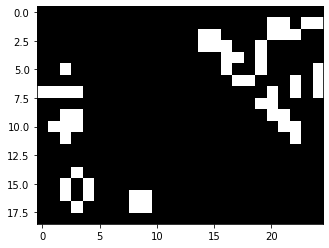

48


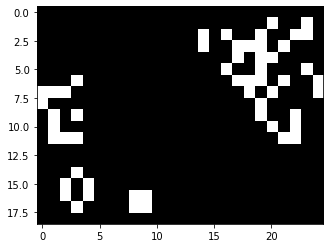

49


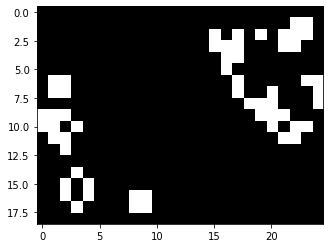

50


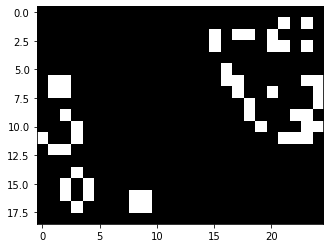

51


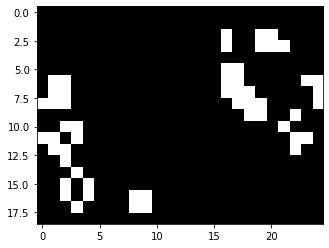

52


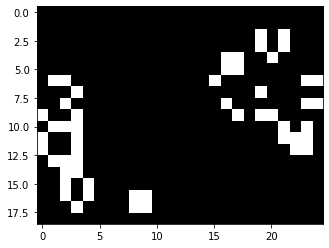

53


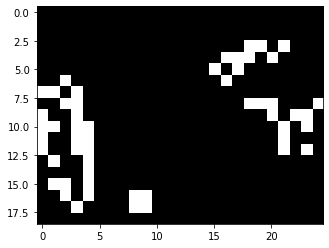

54


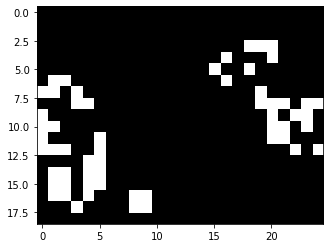

55


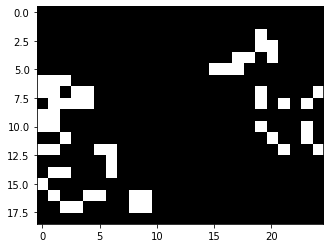

56


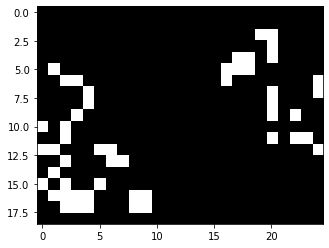

57


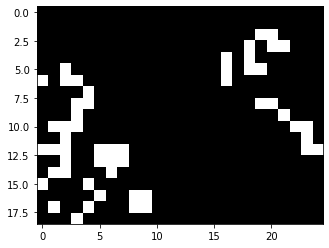

58


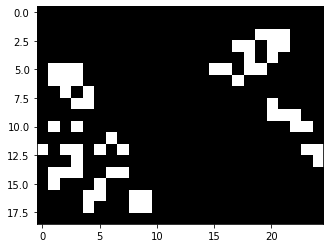

59


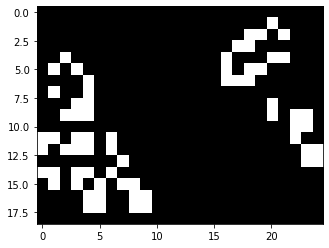

60


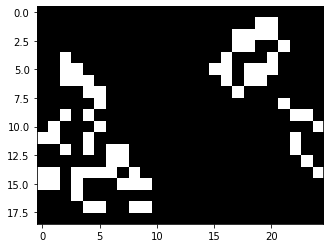

61


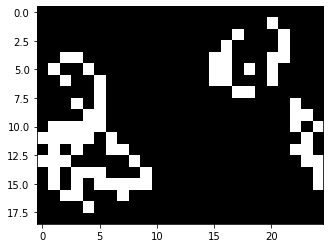

62


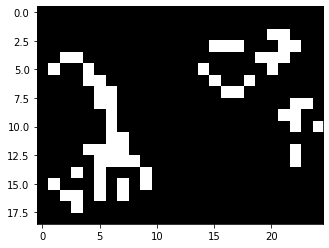

63


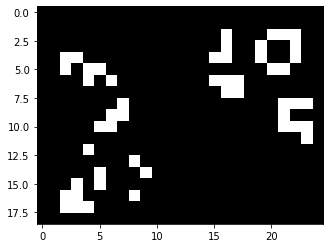

64


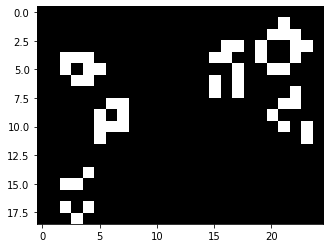

65


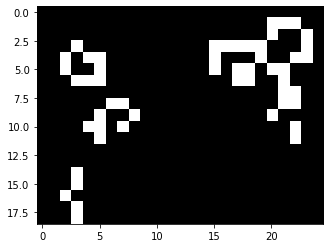

66


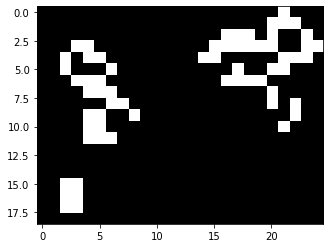

67


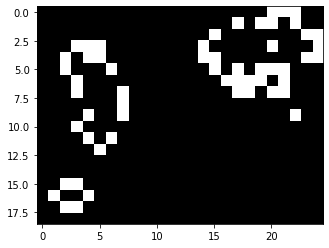

68


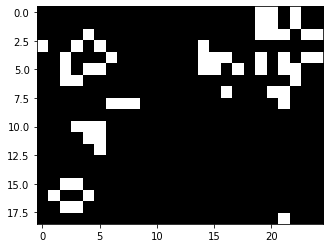

69


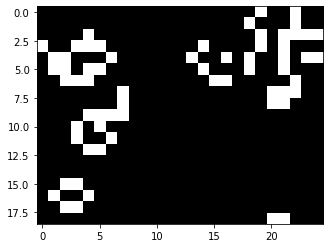

70


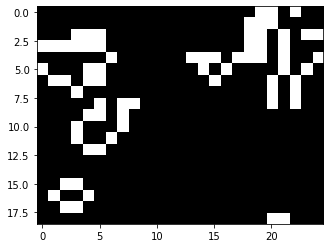

71


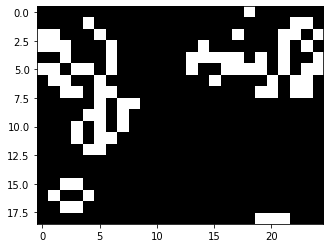

72


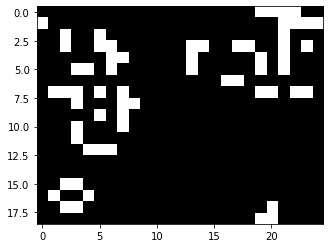

73


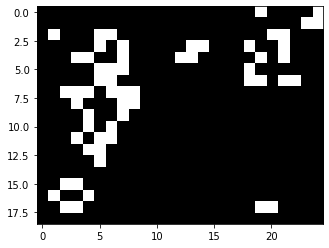

74


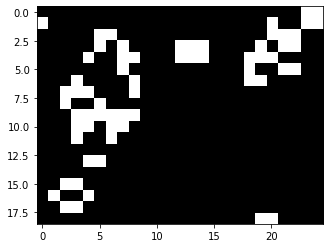

75


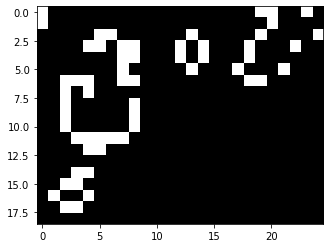

76


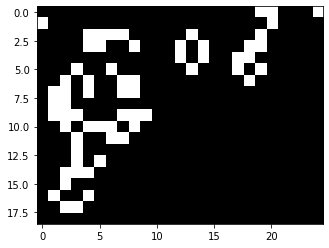

77


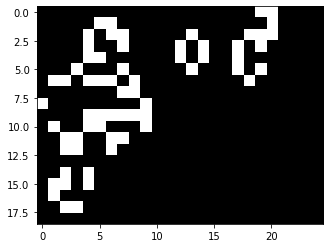

78


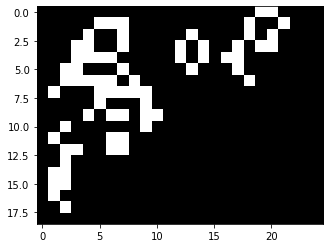

79


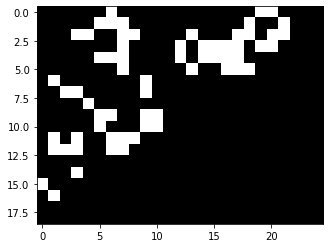

80


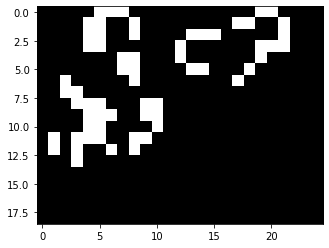

81


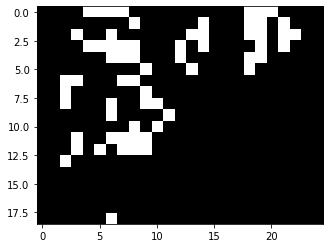

82


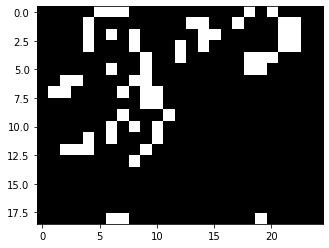

83


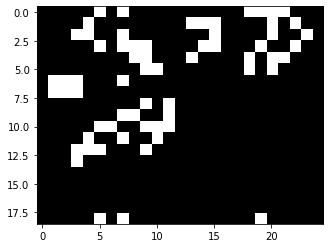

84


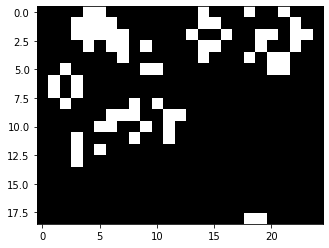

85


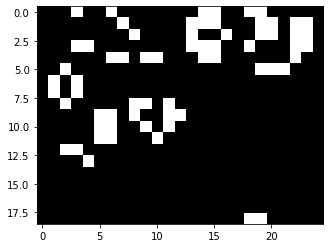

86


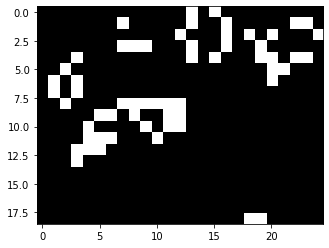

87


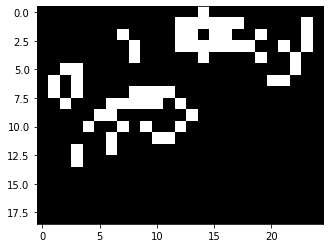

88


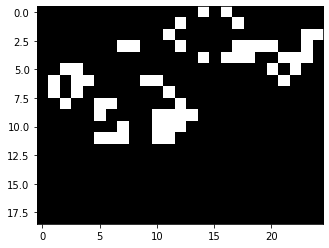

89


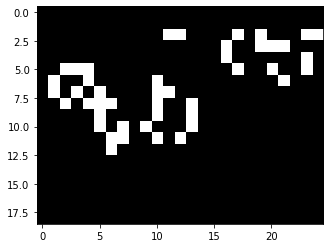

90


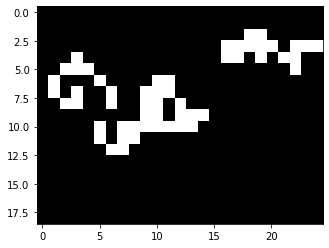

91


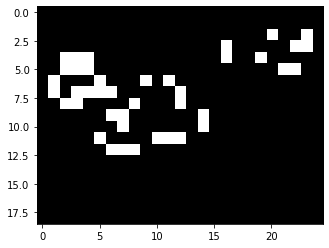

92


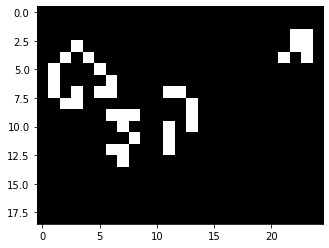

93


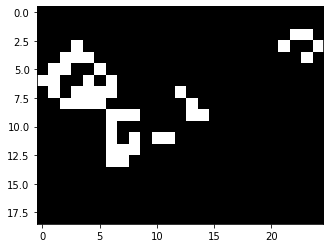

94


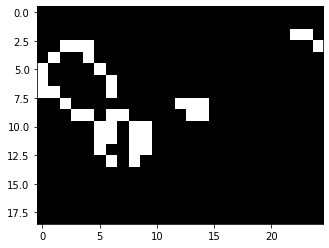

95


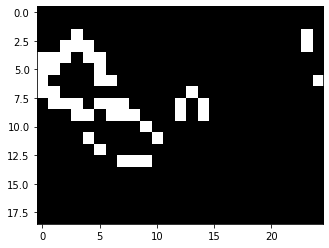

96


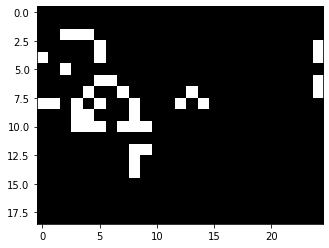

97


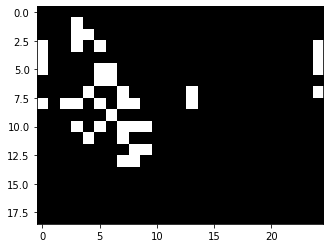

98


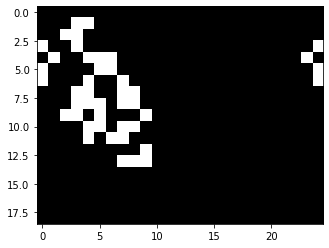

99


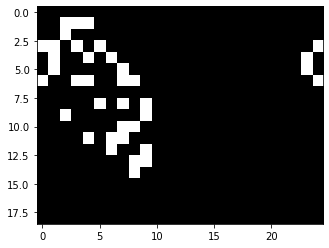

100


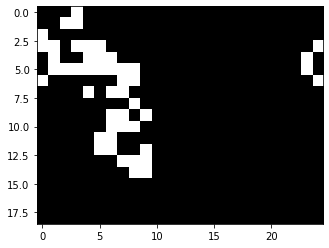

101


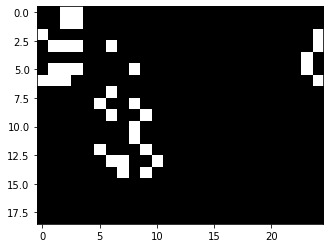

102


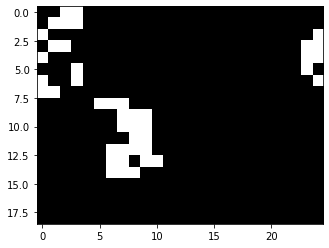

103


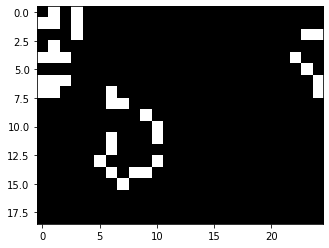

104


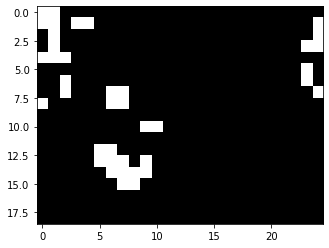

105


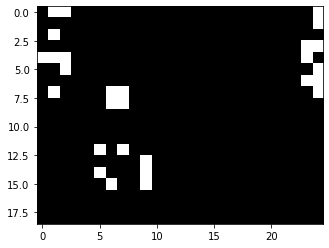

106


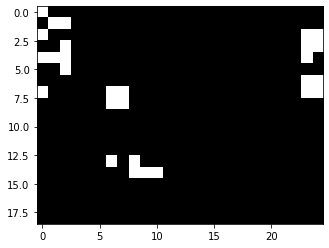

107


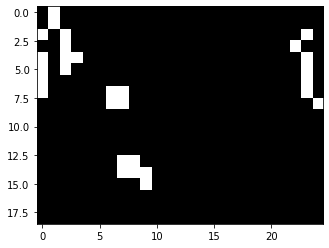

108


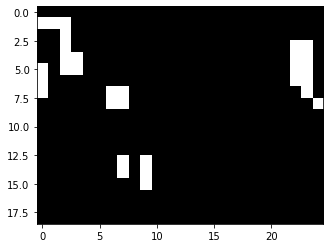

109


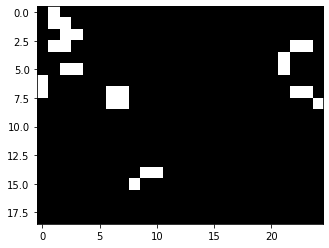

110


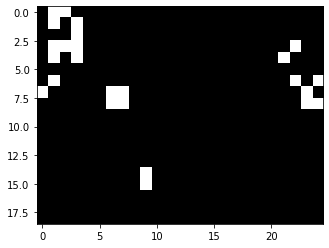

111


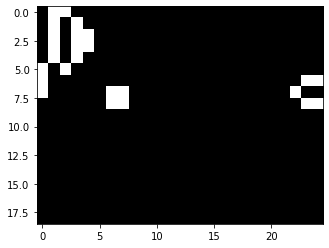

112


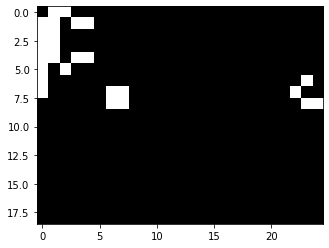

113


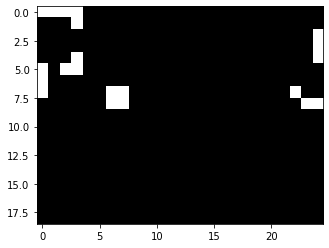

114


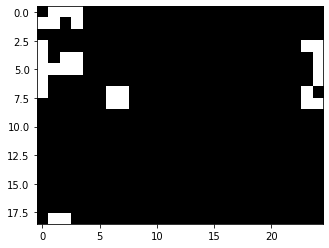

115


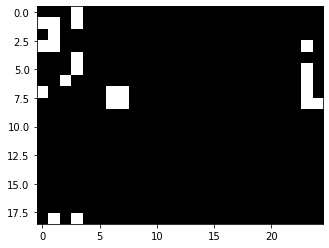

116


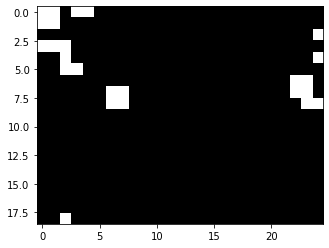

117


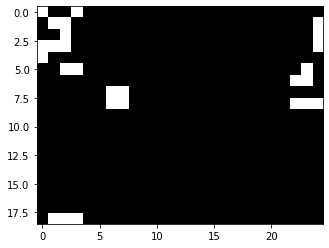

118


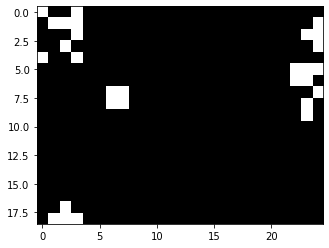

119


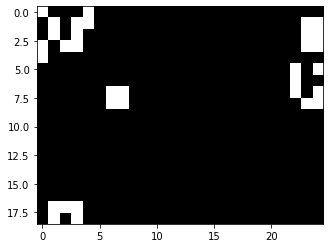

120


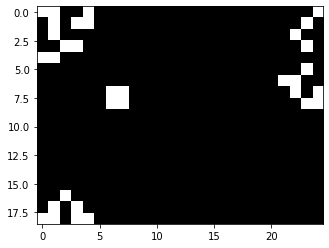

121


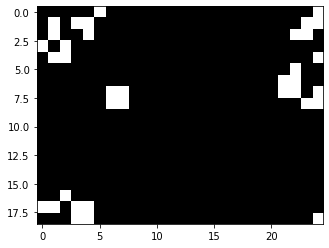

122


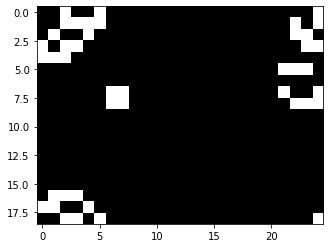

123


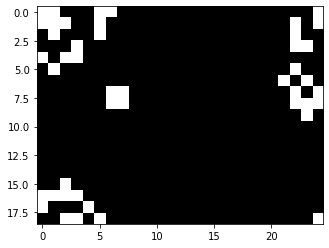

124


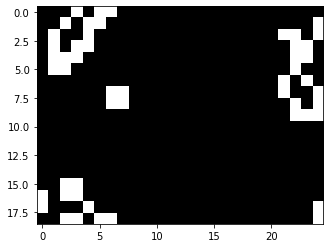

125


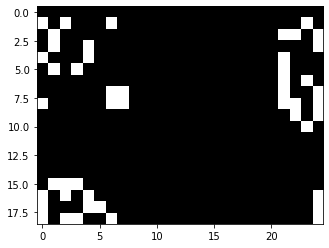

126


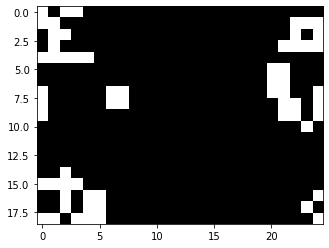

127


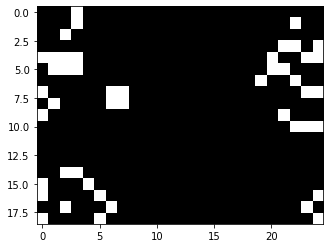

128


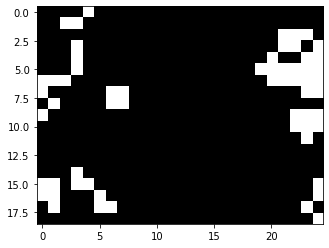

129


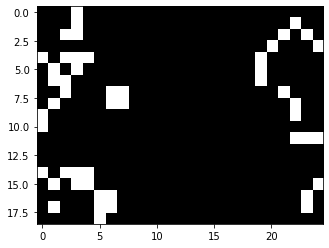

130


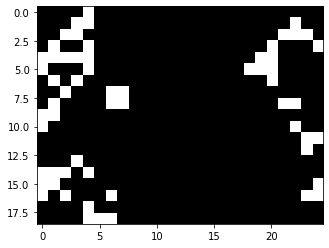

131


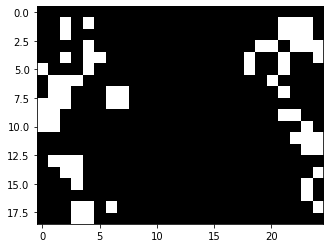

132


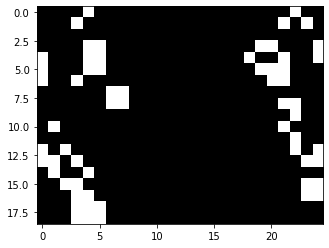

133


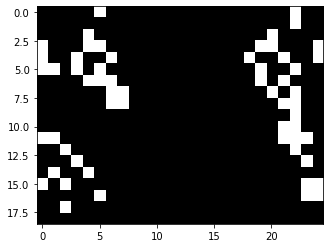

134


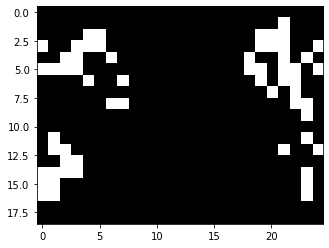

135


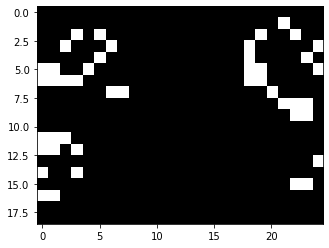

136


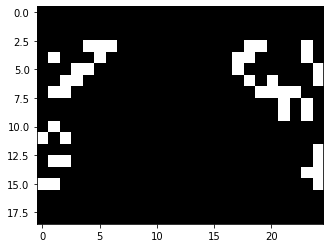

137


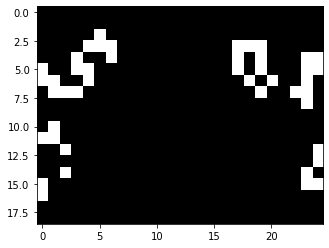

138


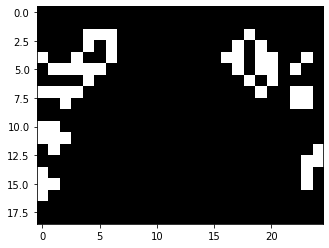

139


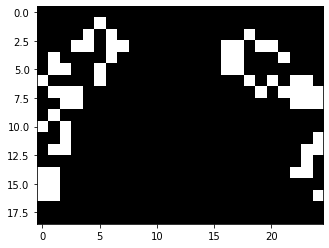

140


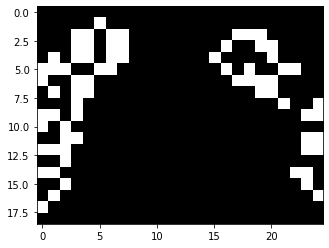

141


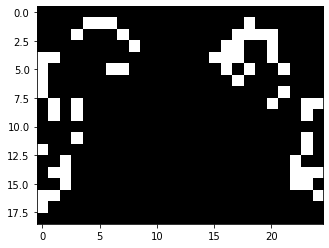

142


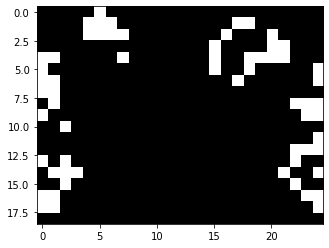

143


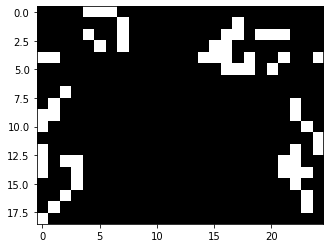

144


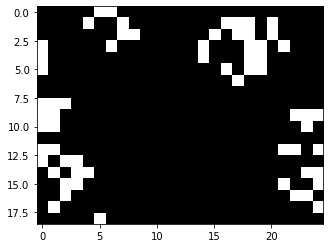

145


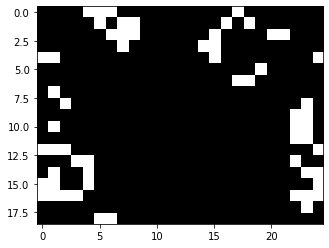

146


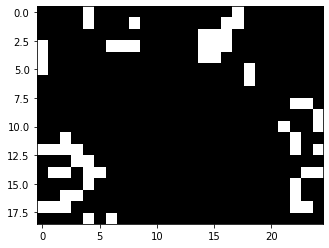

147


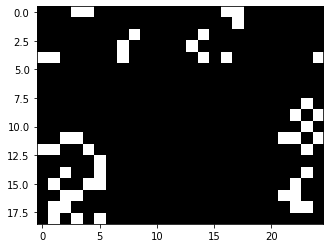

148


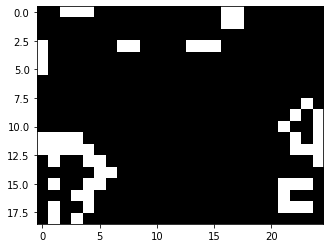

149


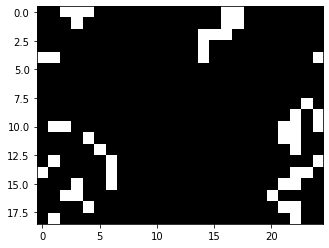

150


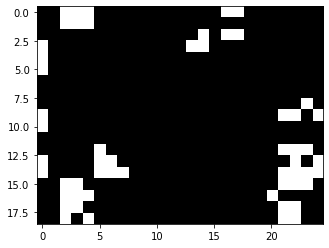

151


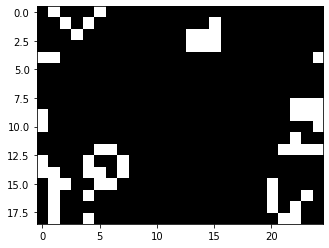

152


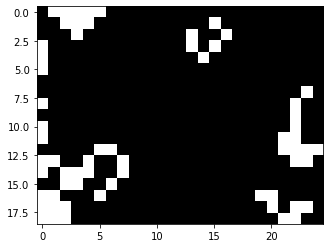

153


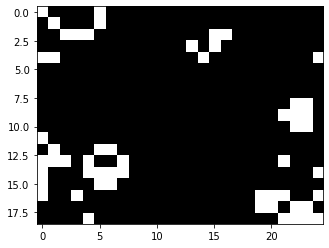

154


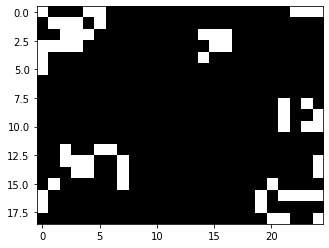

155


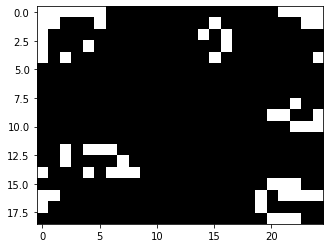

156


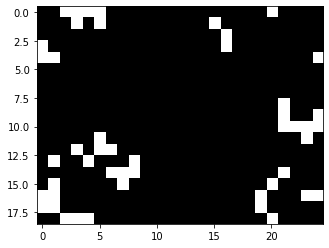

157


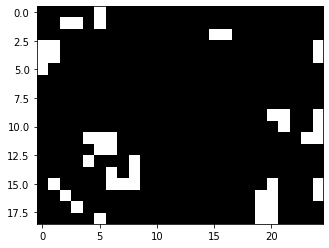

158


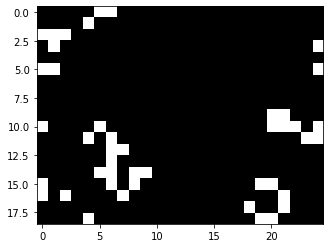

159


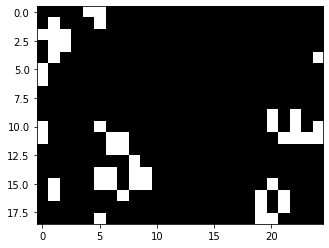

160


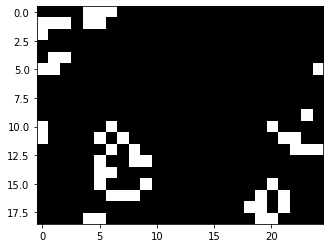

161


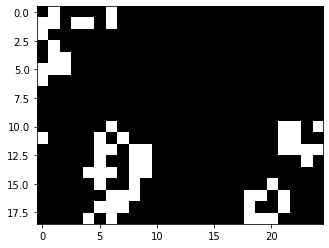

162


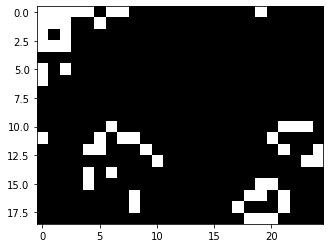

163


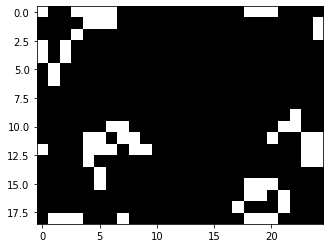

164


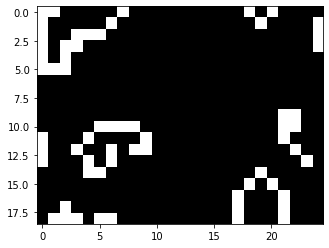

165


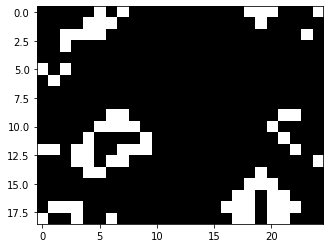

166


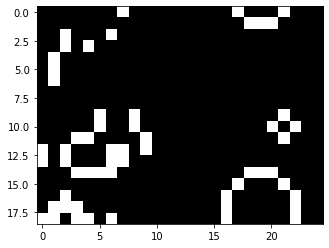

167


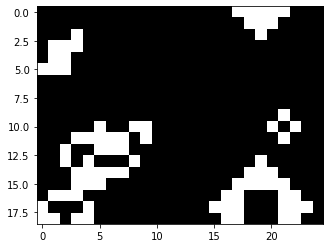

168


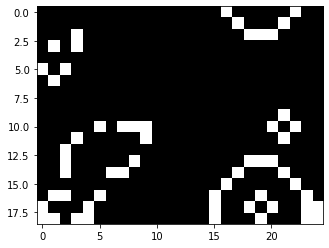

169


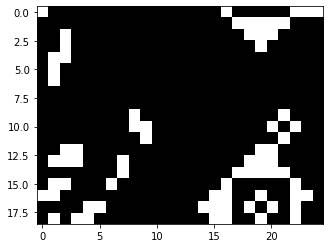

170


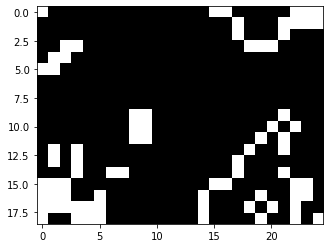

171


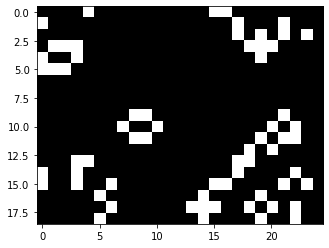

172


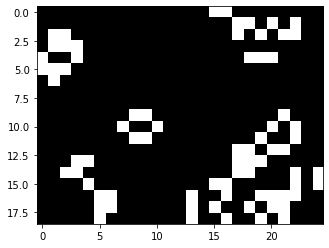

173


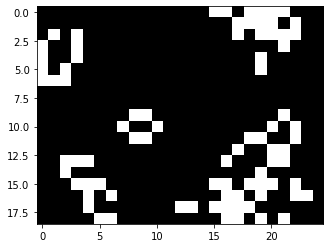

174


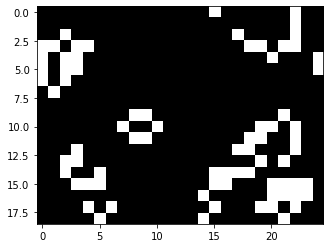

175


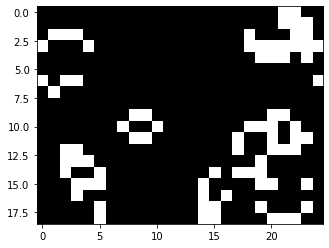

176


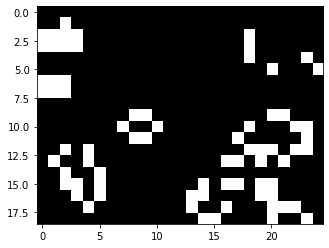

177


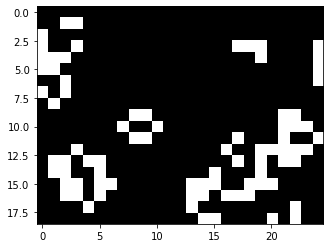

178


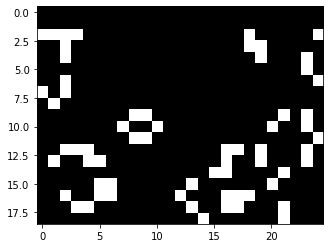

179


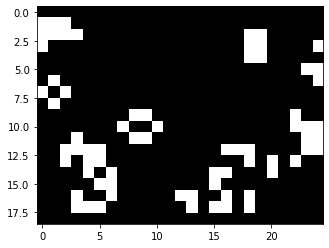

180


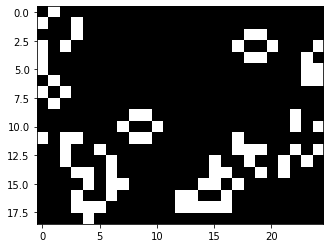

181


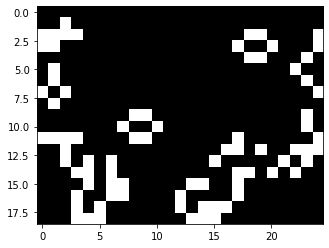

182


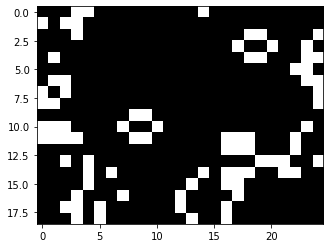

183


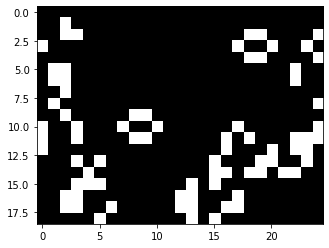

184


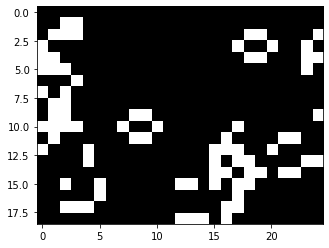

185


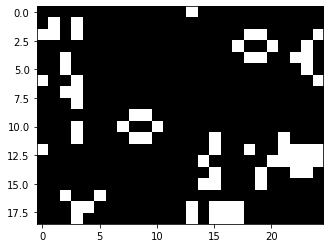

186


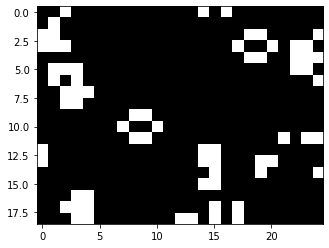

187


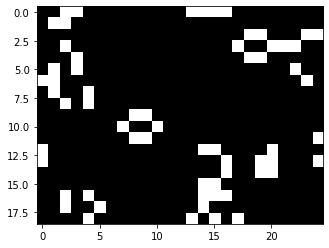

188


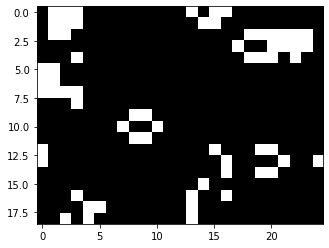

189


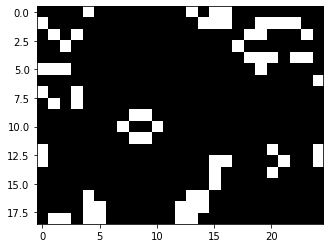

190


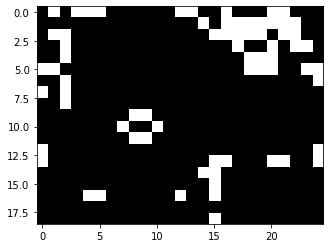

191


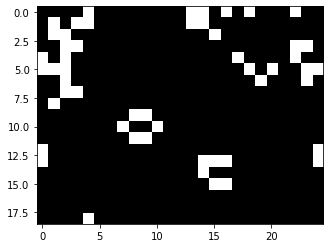

192


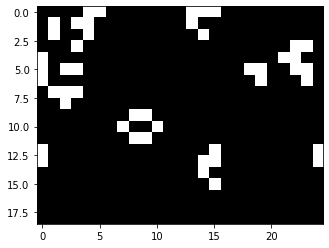

193


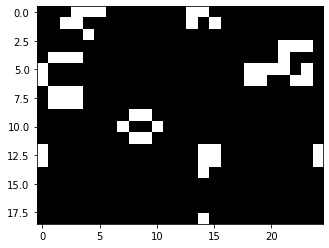

194


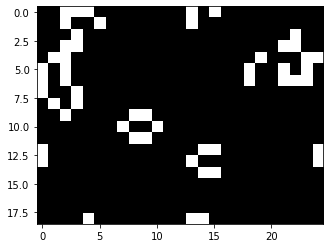

195


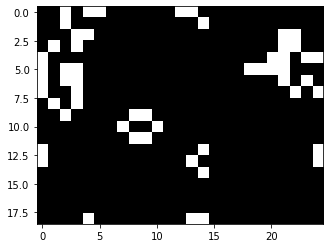

196


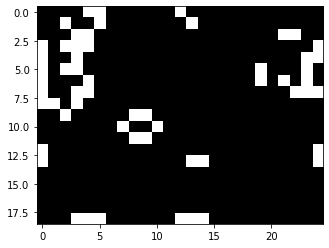

197


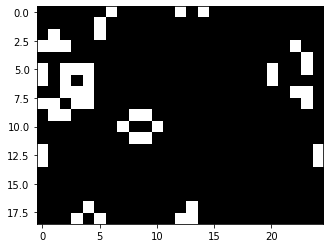

198


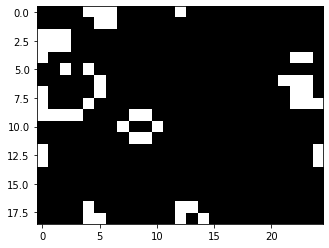

199


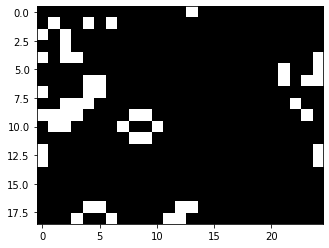

In [15]:
#Second Initial condition

field_x = np.random.randint(15, 30)
field_y = np.random.randint(19, 37)

field_random = np.zeros((field_x,field_y), 'int')
live_30_pers = int(285*0.3)

random_x_ind = np.random.randint(0, field_random.shape[0], live_30_pers)
random_y_ind = np.random.randint(0, field_random.shape[1], live_30_pers)

for i in range(live_30_pers):
    field_random[random_x_ind[i],random_y_ind[i]] = 1
    
Random_n_of_the_living_cells, Random_time, Random_list_to_gif = logic_and_plotting(field_random)

0


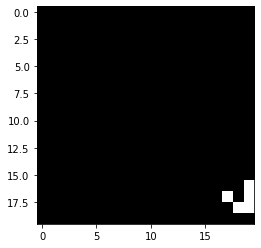

1


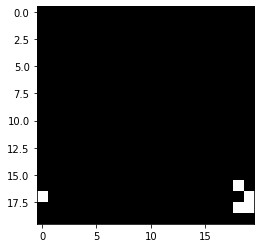

2


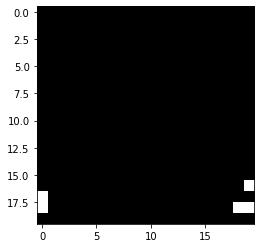

3


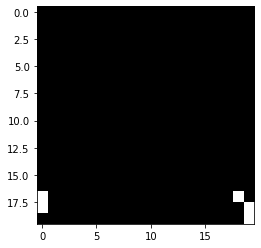

4


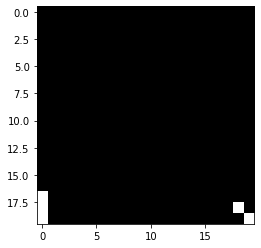

5


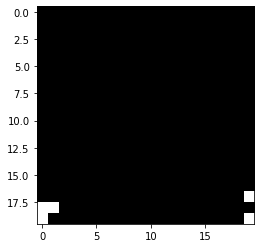

6


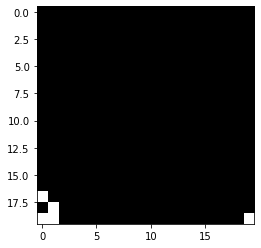

7


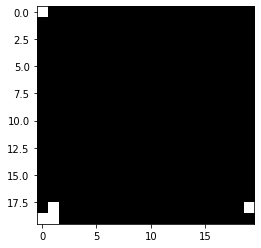

8


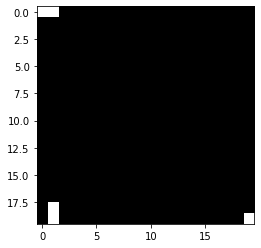

9


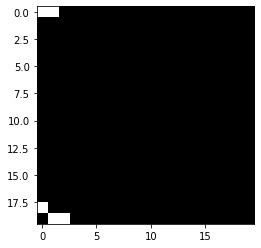

10


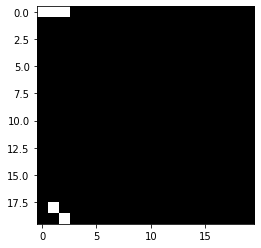

11


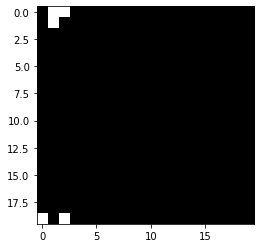

12


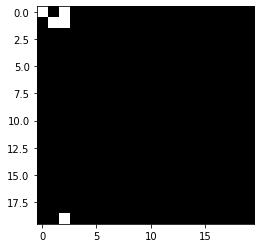

13


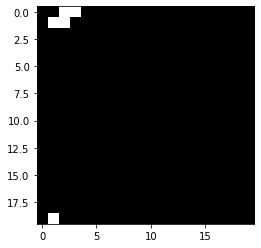

14


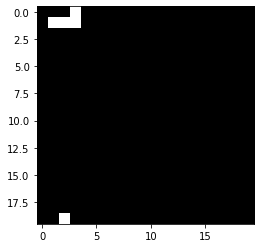

15


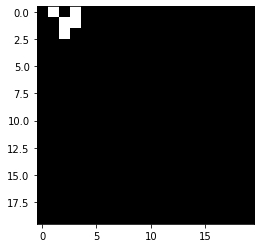

16


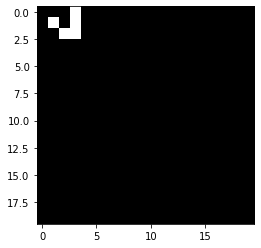

17


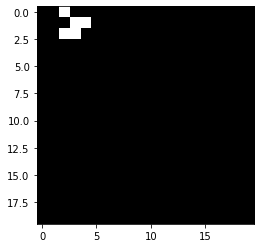

18


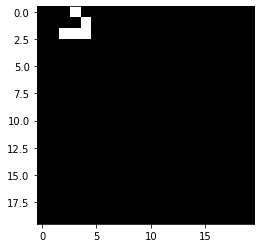

19


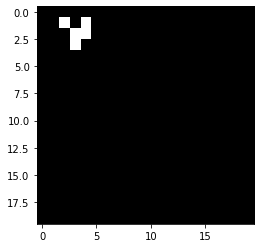

20


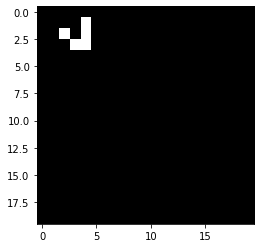

21


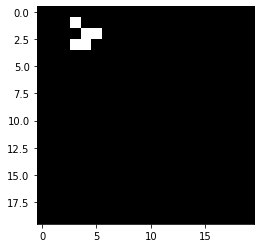

22


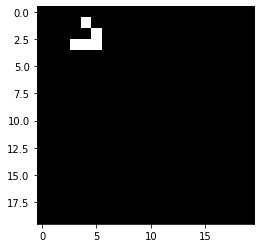

23


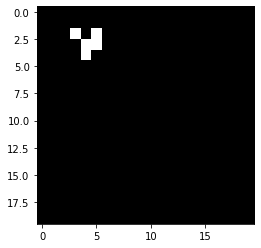

24


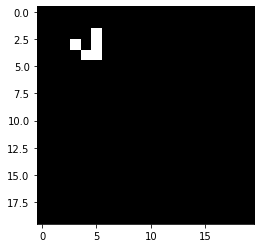

25


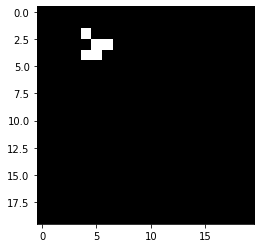

26


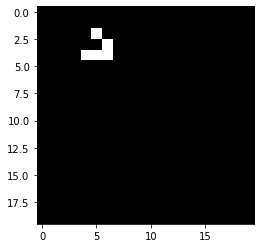

27


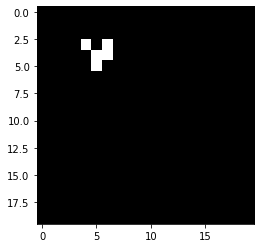

28


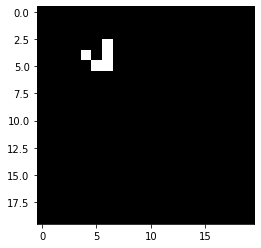

29


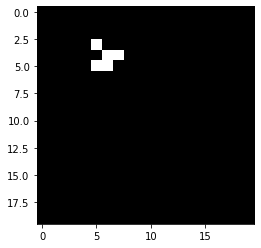

30


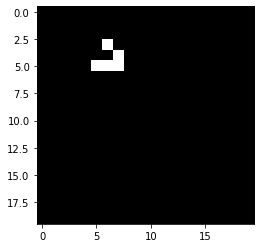

31


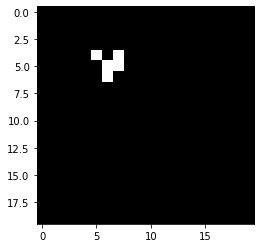

32


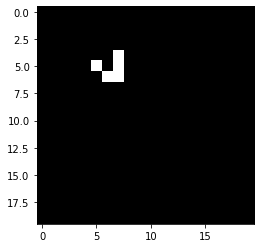

33


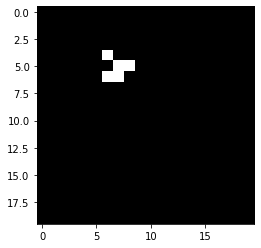

34


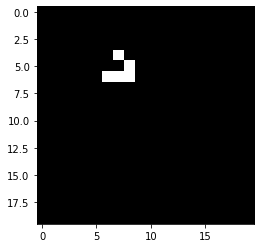

35


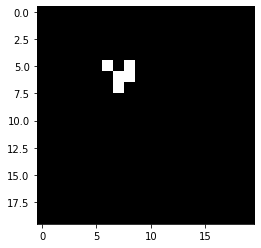

36


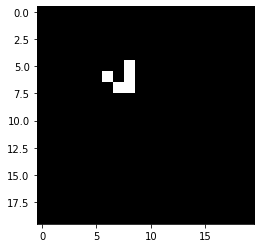

37


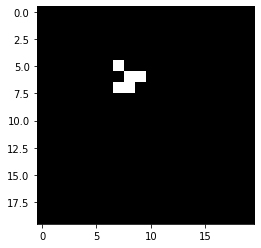

38


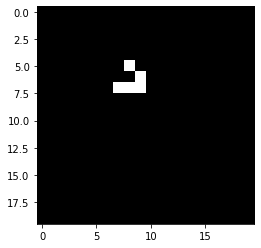

39


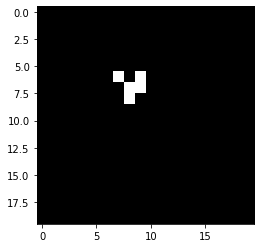

40


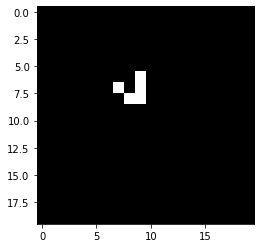

41


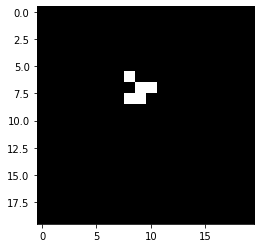

42


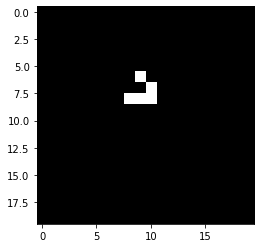

43


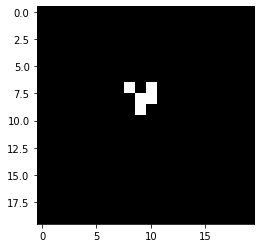

44


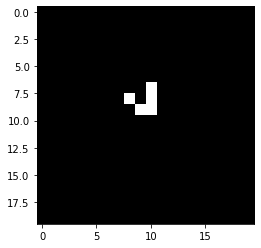

45


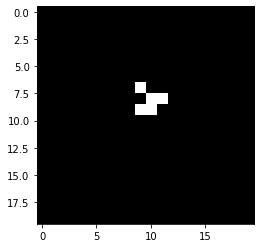

46


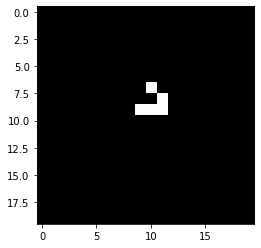

47


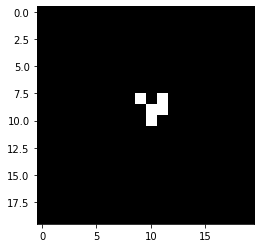

48


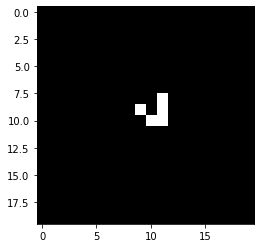

49


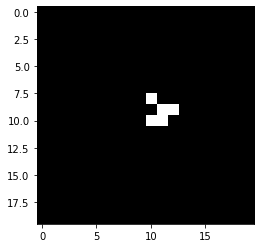

50


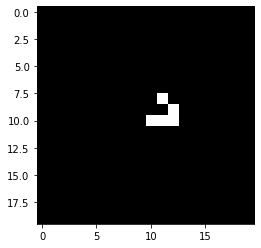

51


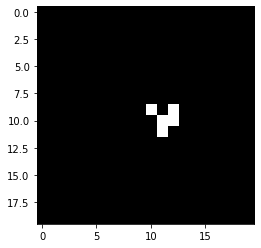

52


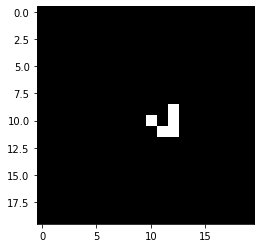

53


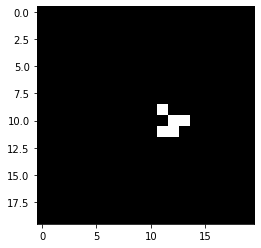

54


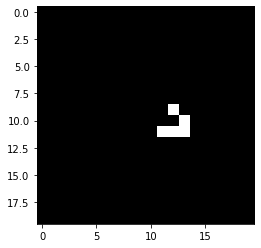

55


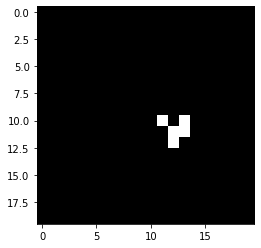

56


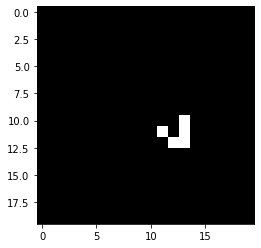

57


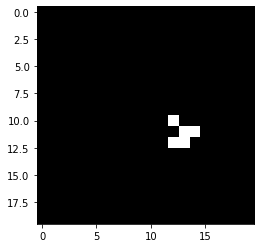

58


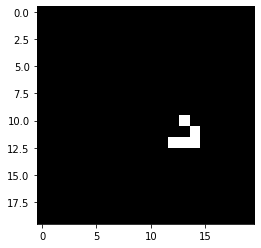

59


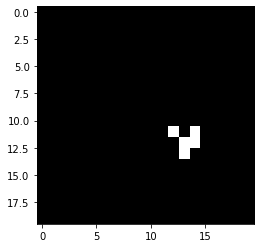

60


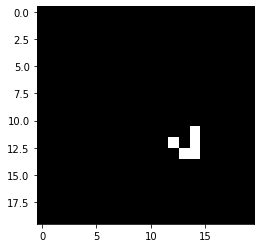

61


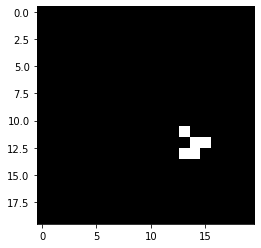

62


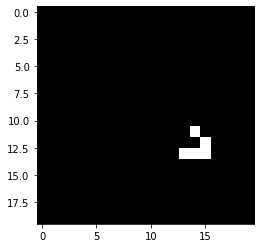

63


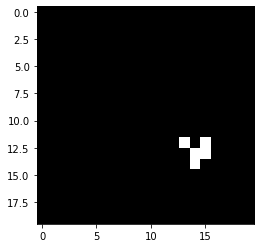

64


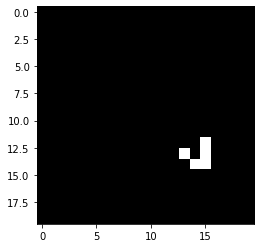

65


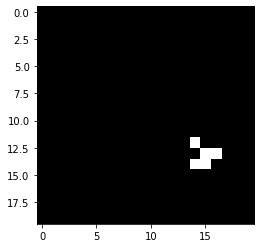

66


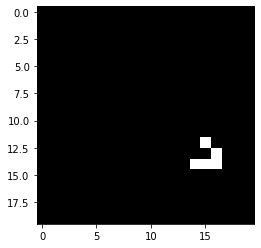

67


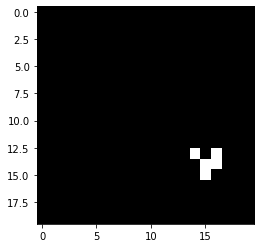

68


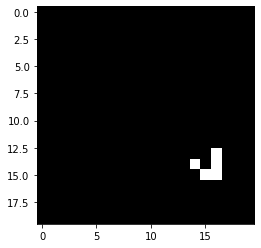

69


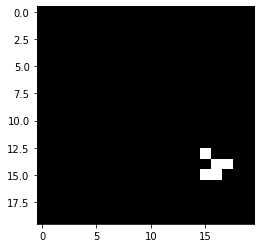

70


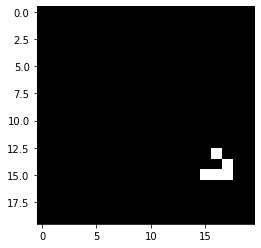

71


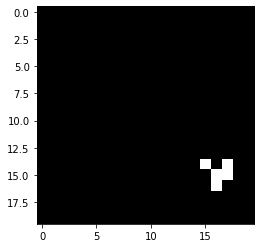

72


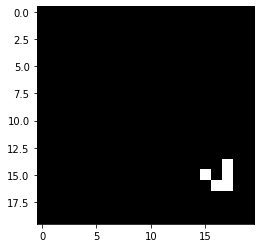

73


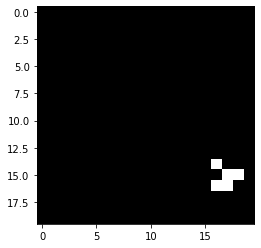

74


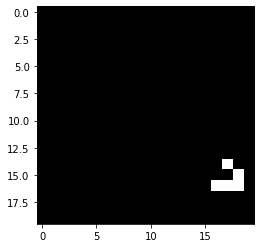

75


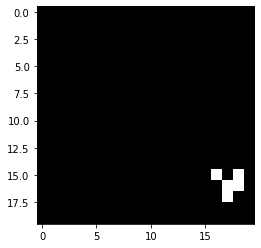

76


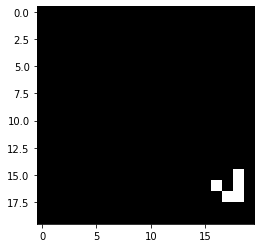

77


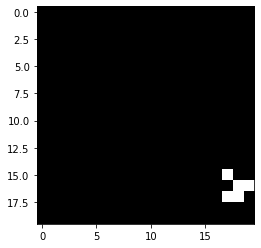

78


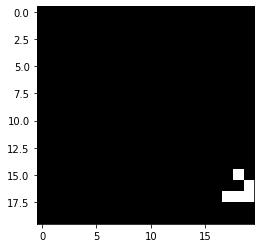

79


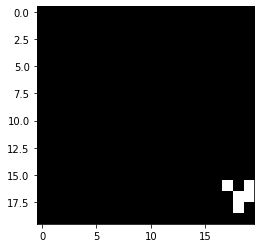

80


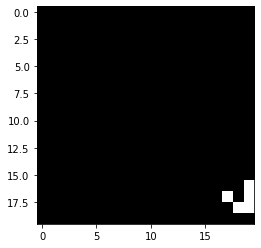

81


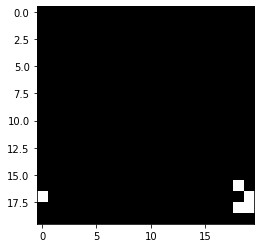

82


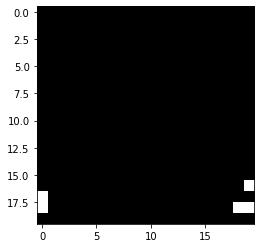

83


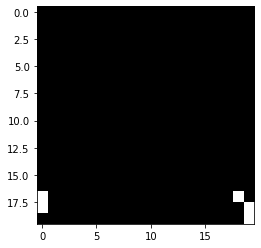

84


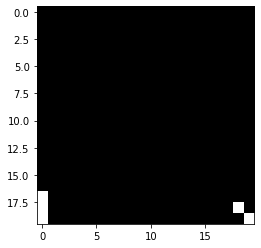

85


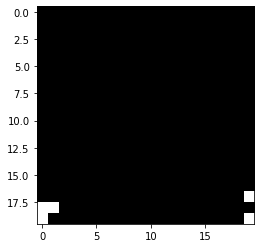

86


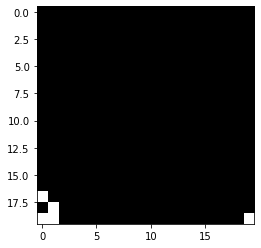

87


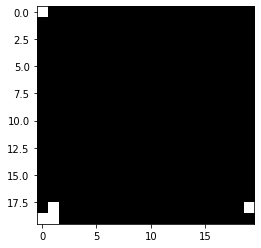

88


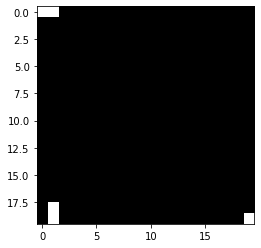

89


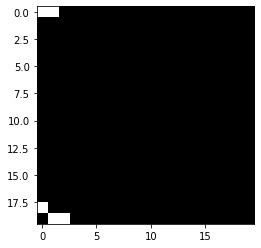

90


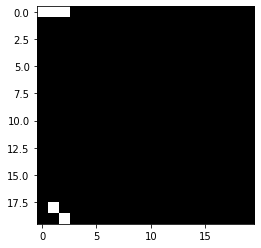

91


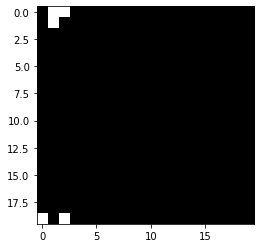

92


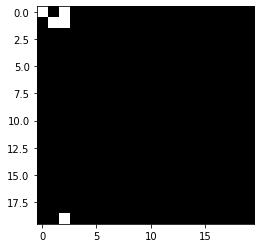

93


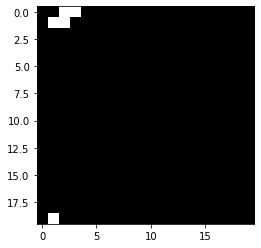

94


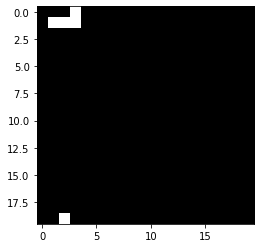

95


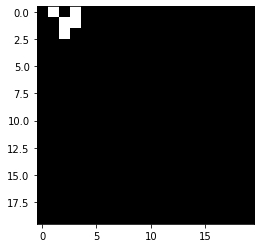

96


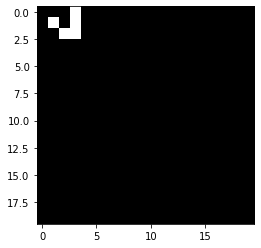

97


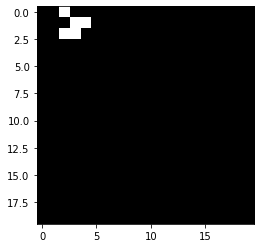

98


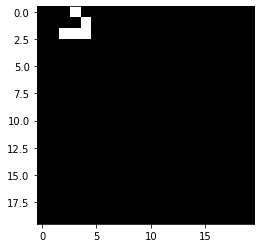

99


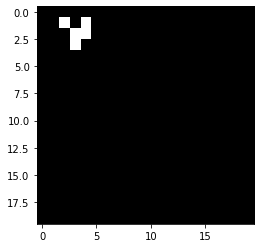

100


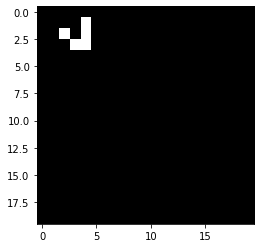

101


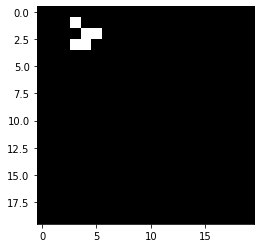

102


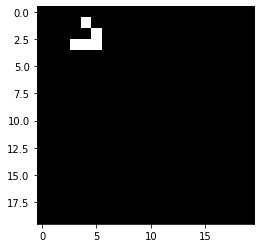

103


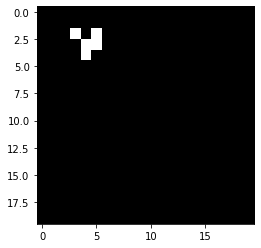

104


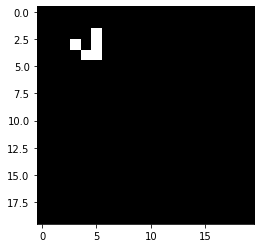

105


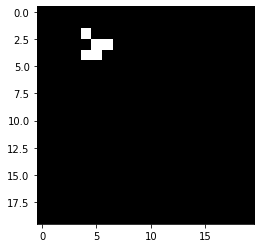

106


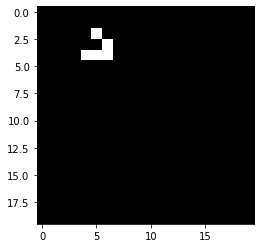

107


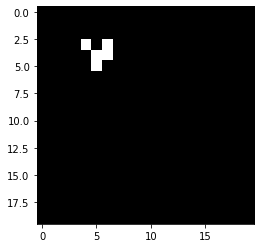

108


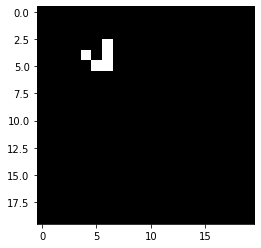

109


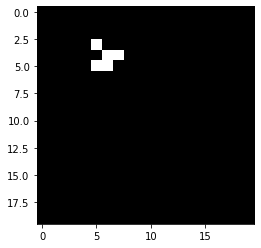

110


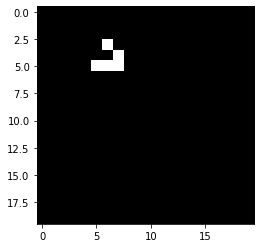

111


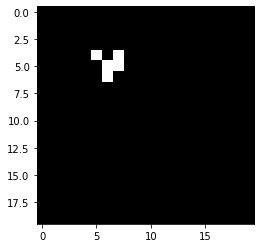

112


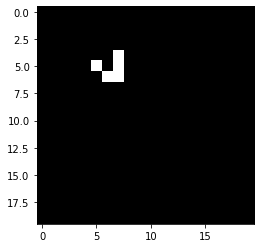

113


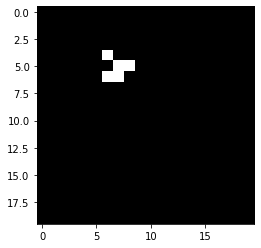

114


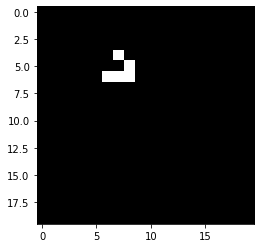

115


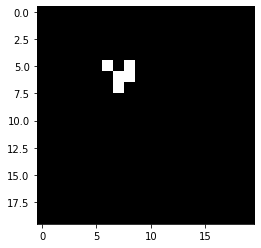

116


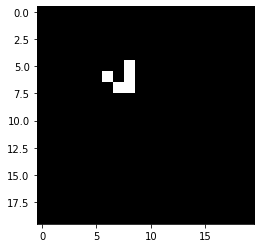

117


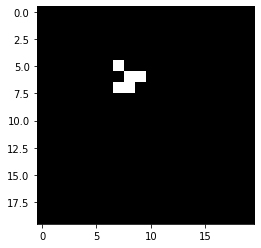

118


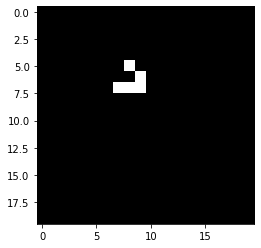

119


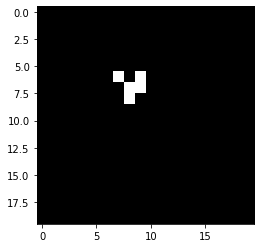

120


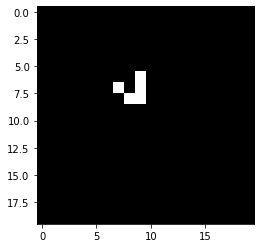

121


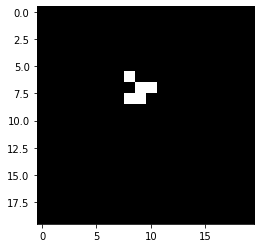

122


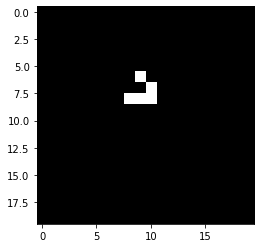

123


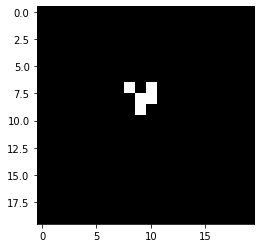

124


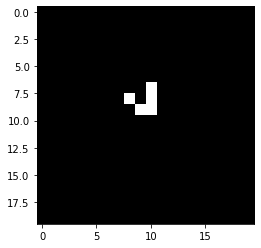

125


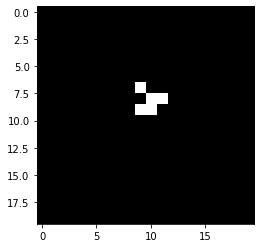

126


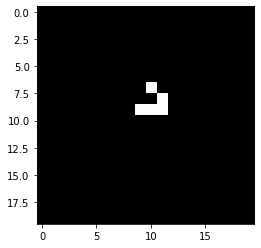

127


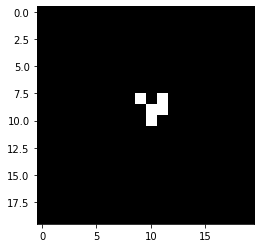

128


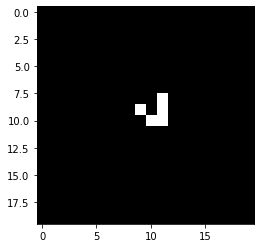

129


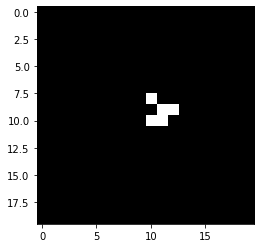

130


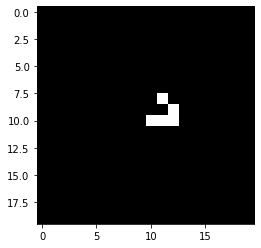

131


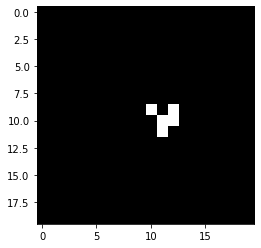

132


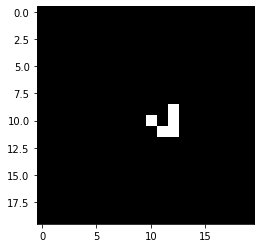

133


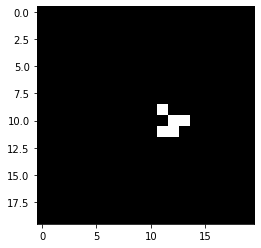

134


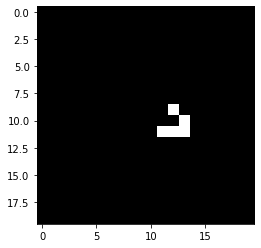

135


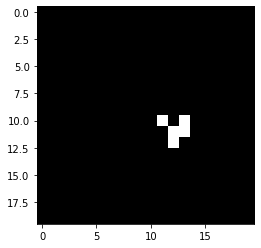

136


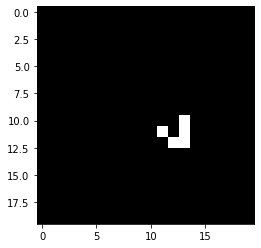

137


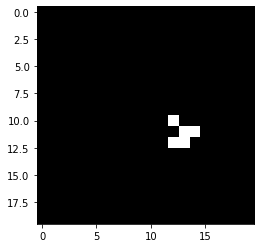

138


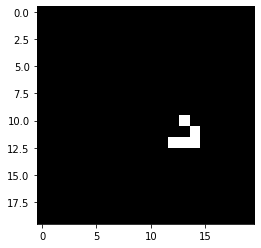

139


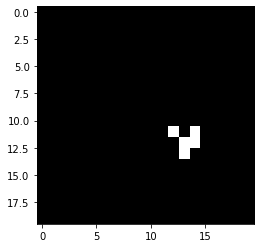

140


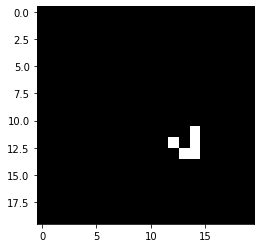

141


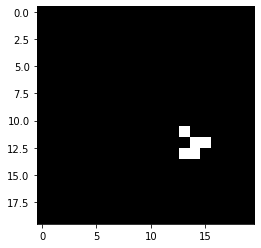

142


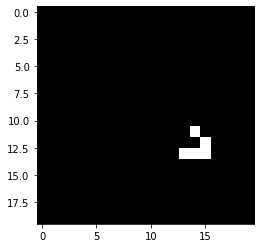

143


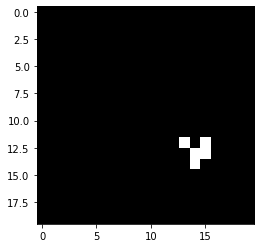

144


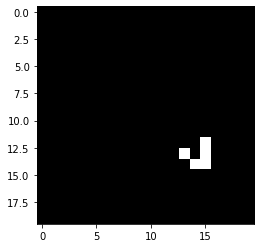

145


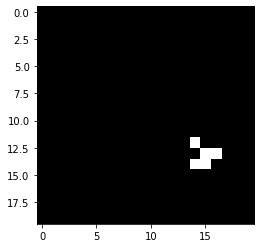

146


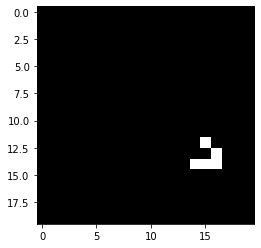

147


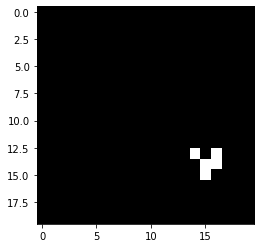

148


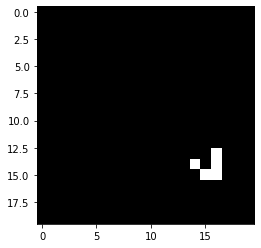

149


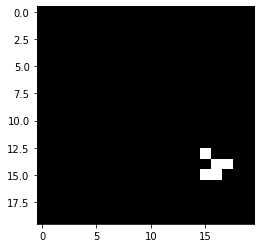

150


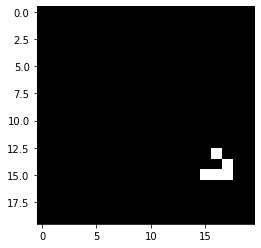

151


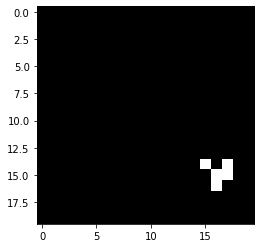

152


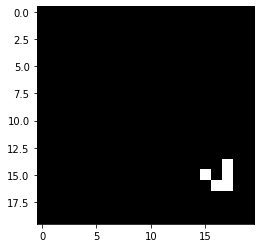

153


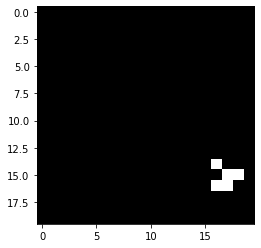

154


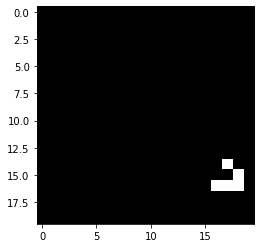

155


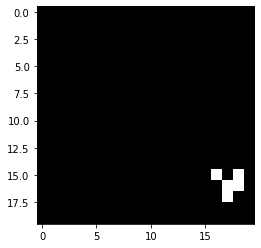

156


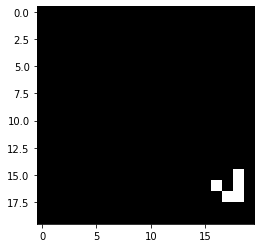

157


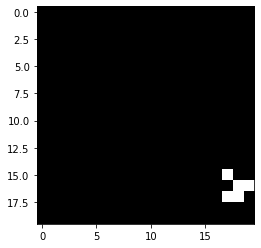

158


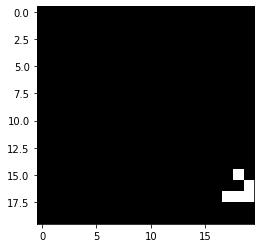

159


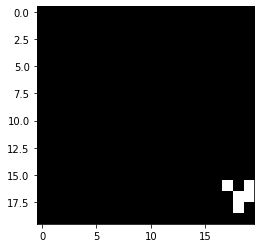

160


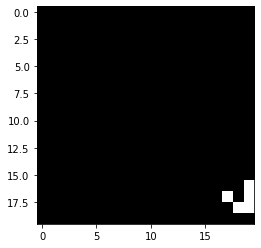

161


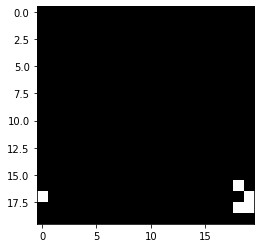

162


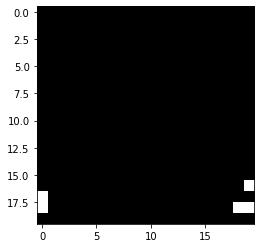

163


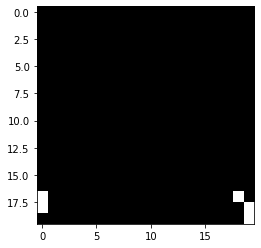

164


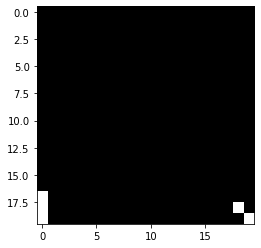

165


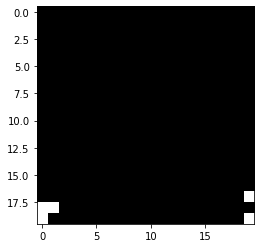

166


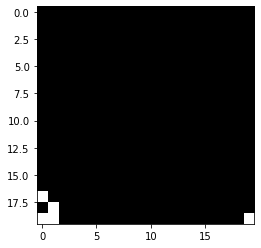

167


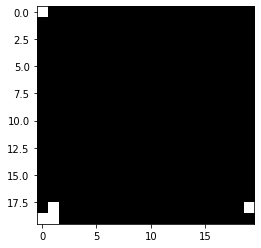

168


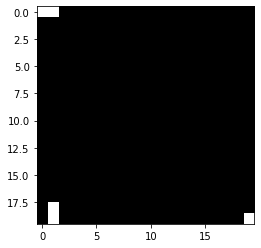

169


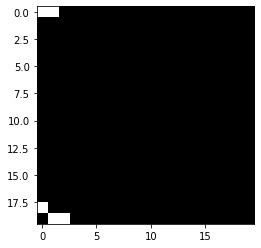

170


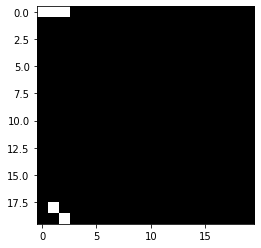

171


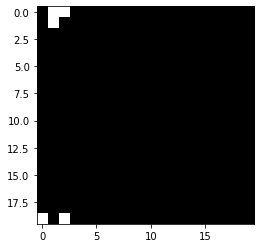

172


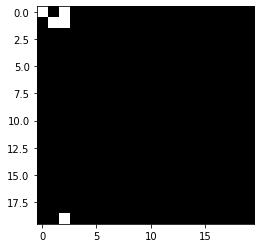

173


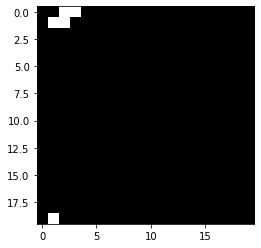

174


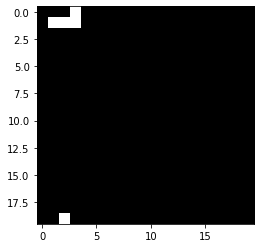

175


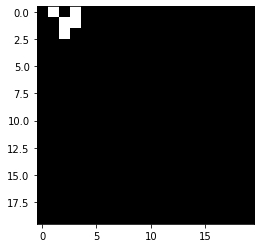

176


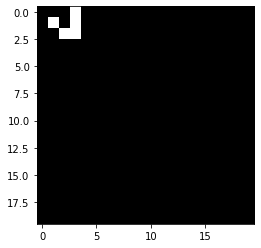

177


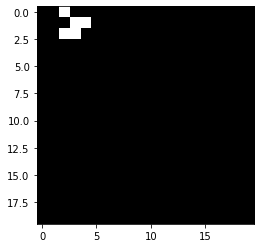

178


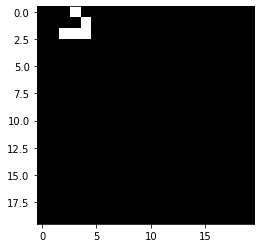

179


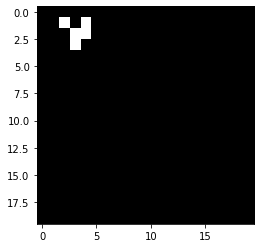

180


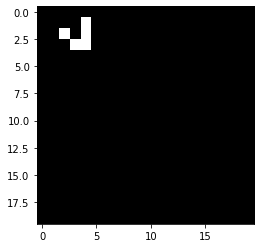

181


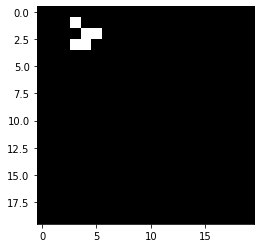

182


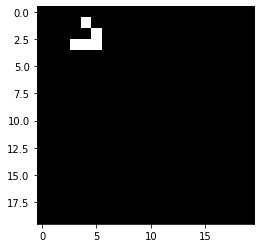

183


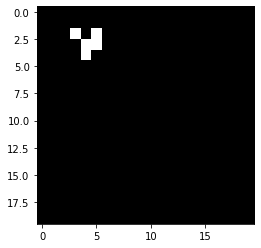

184


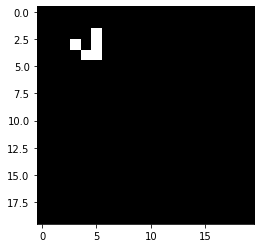

185


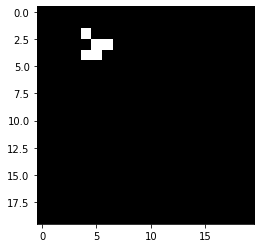

186


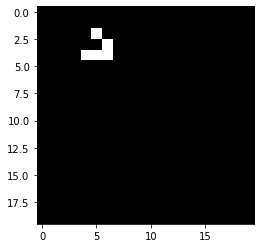

187


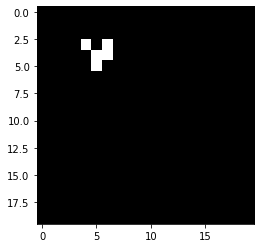

188


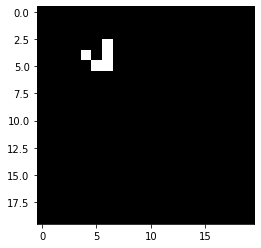

189


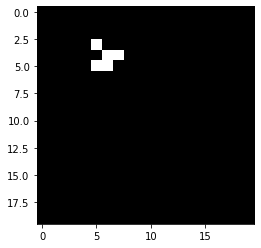

190


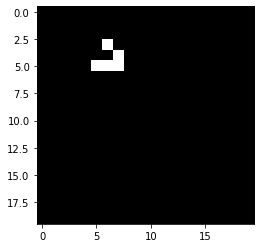

191


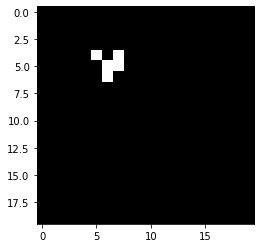

192


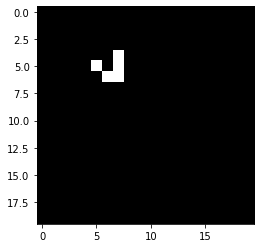

193


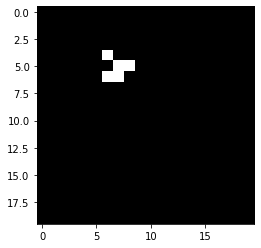

194


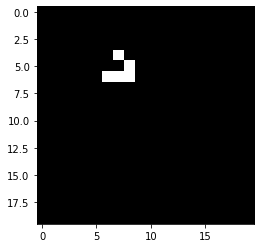

195


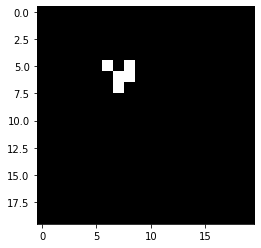

196


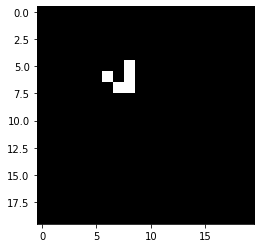

197


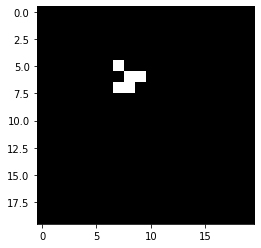

198


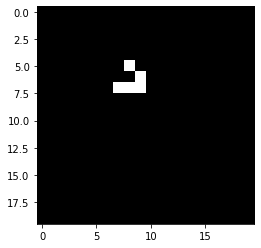

199


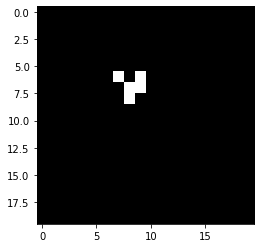

In [4]:
## Just Simple movement. It was my first test
Simple_movement = np.zeros((20,20), 'int')
Simple_movement[7+10,7+10] = 1
Simple_movement[8+10,8+10] = 1
Simple_movement[8+10,9+10] = 1
Simple_movement[7+10,9+10] = 1
Simple_movement[6+10,9+10] = 1

Simple_n_of_the_living_cells, Simple_time, Simple_list_to_gif = logic_and_plotting(Simple_movement)

0


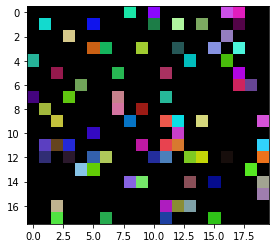

1


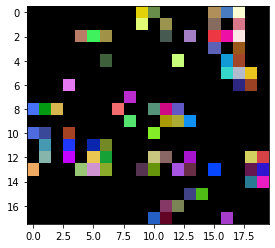

2


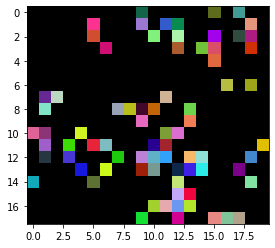

3


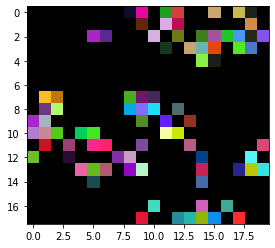

4


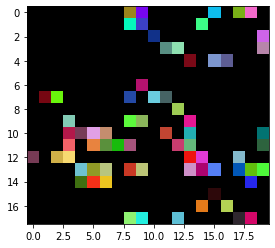

5


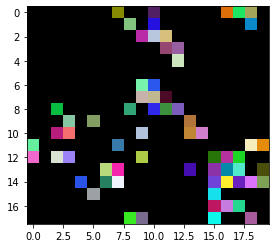

6


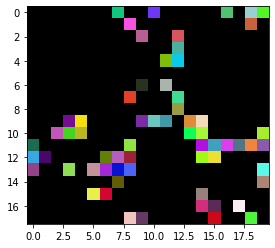

7


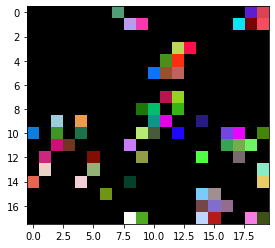

8


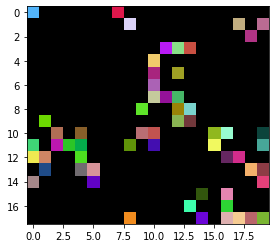

9


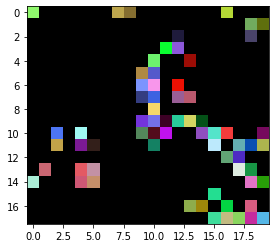

10


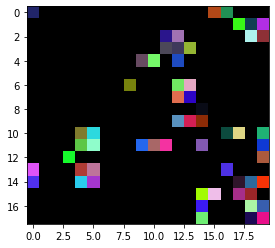

11


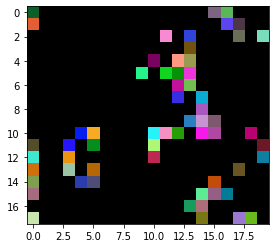

12


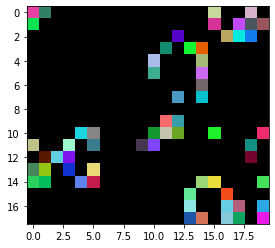

13


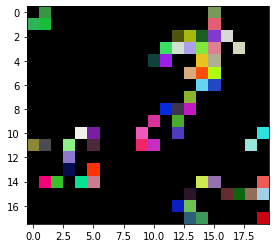

14


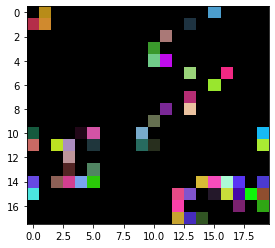

15


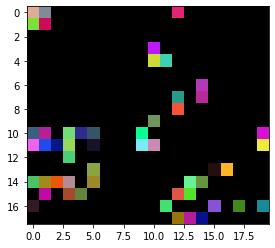

16


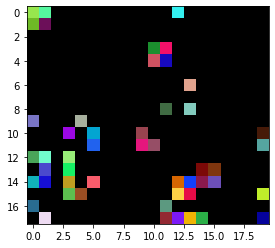

17


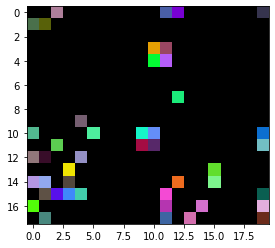

18


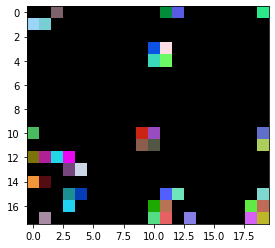

19


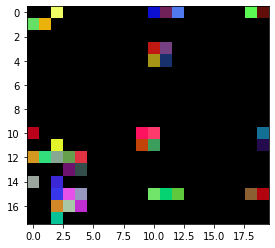

20


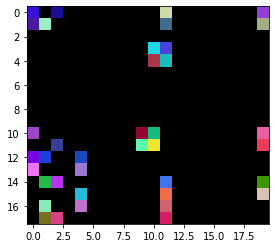

21


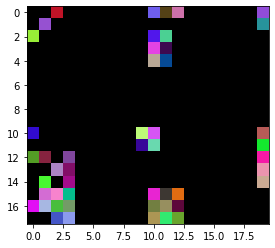

22


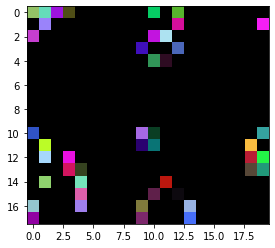

23


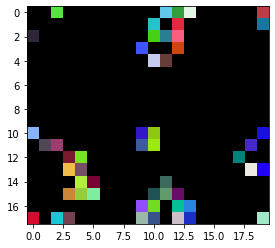

24


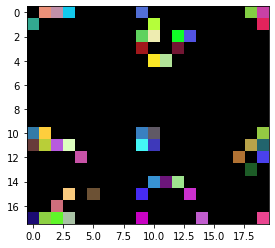

25


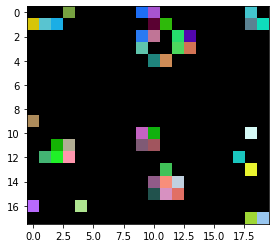

26


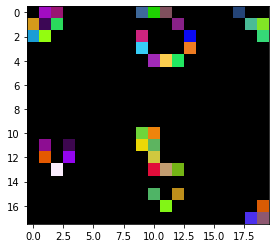

27


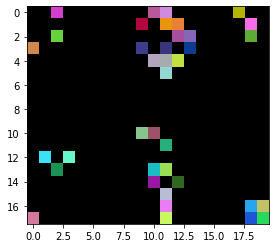

28


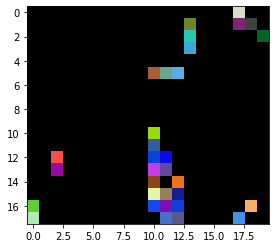

29


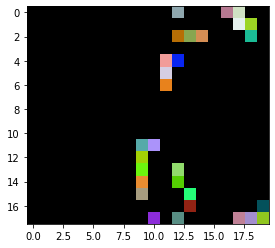

30


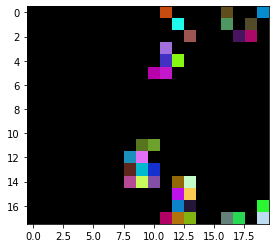

31


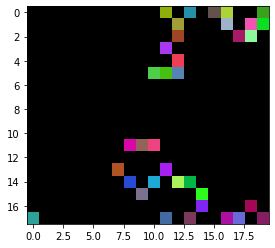

32


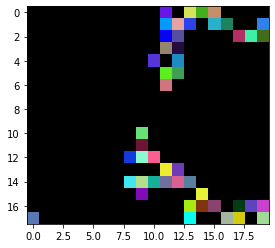

33


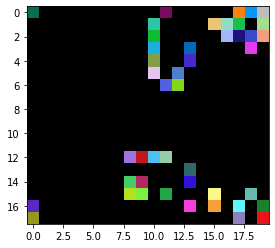

34


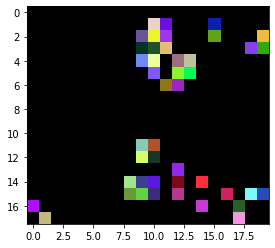

35


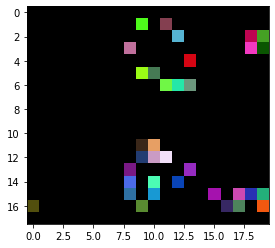

36


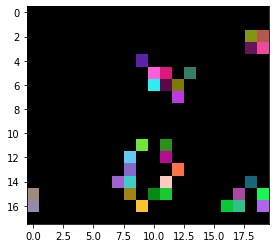

37


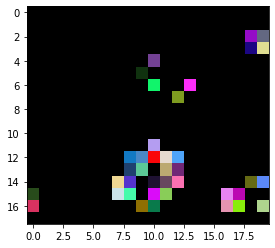

38


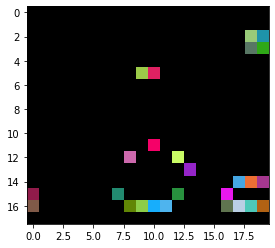

39


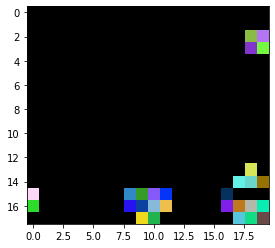

40


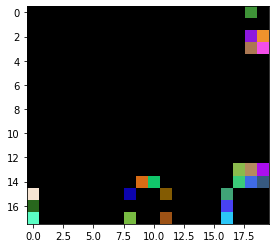

41


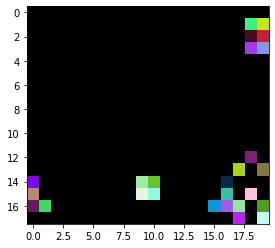

42


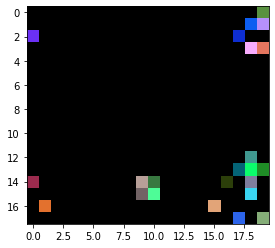

43


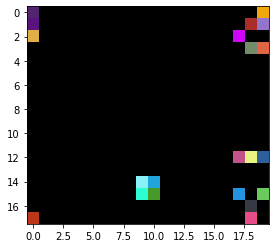

44


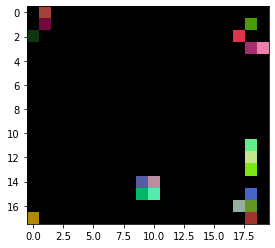

45


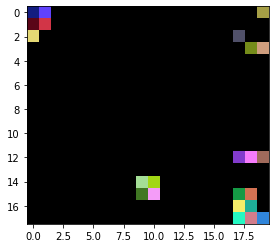

46


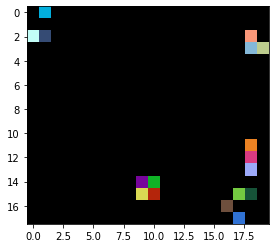

47


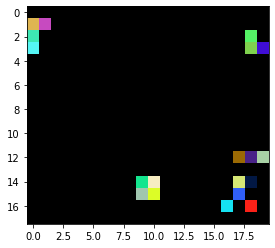

48


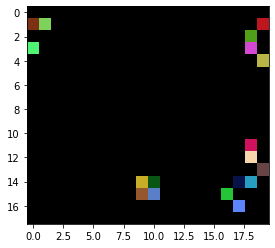

49


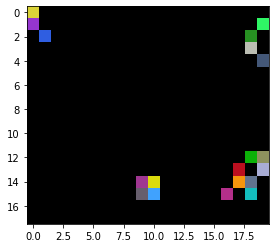

50


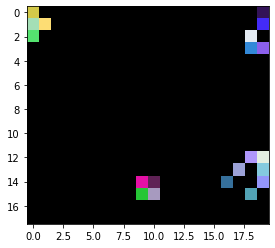

51


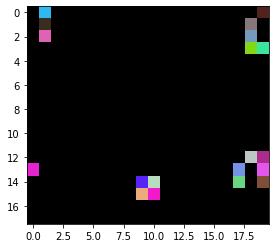

52


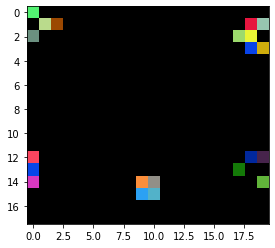

53


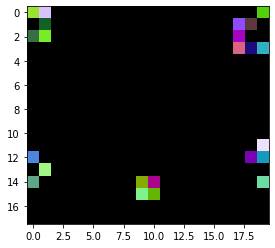

54


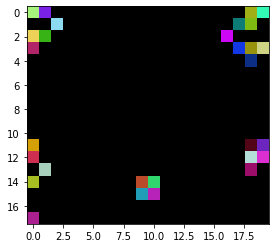

55


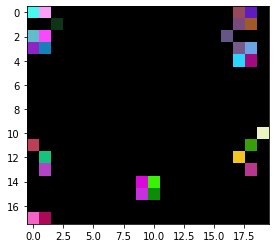

56


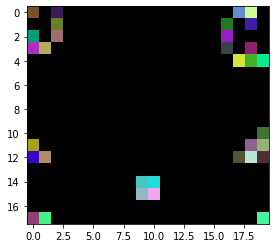

57


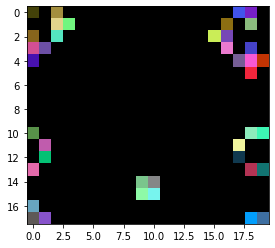

58


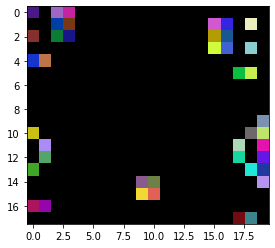

59


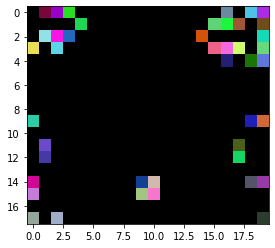

60


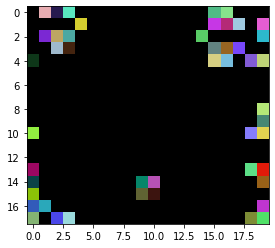

61


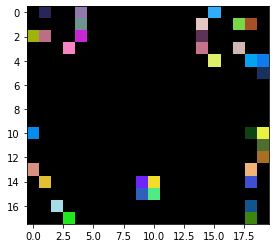

62


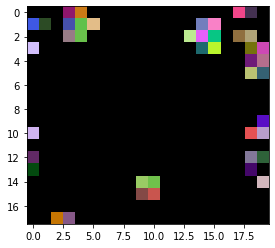

63


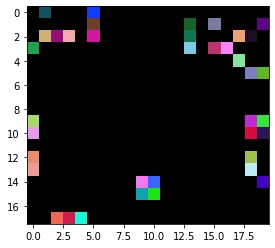

64


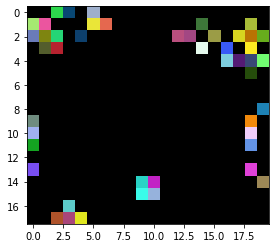

65


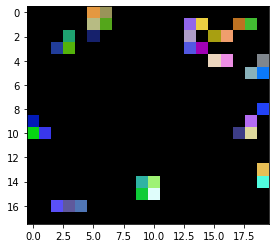

66


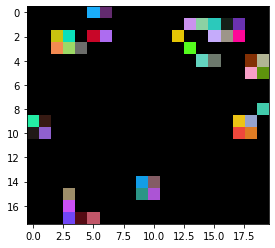

67


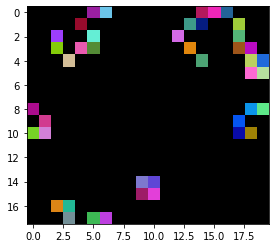

68


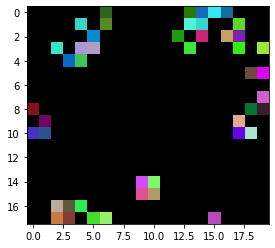

69


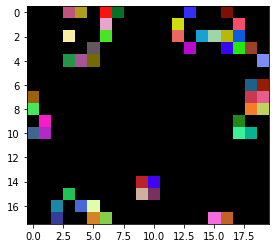

70


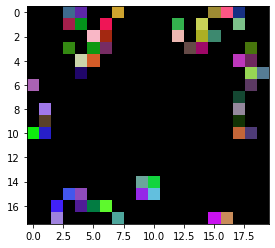

71


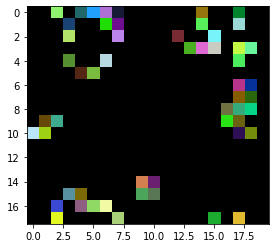

72


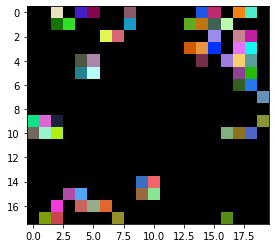

73


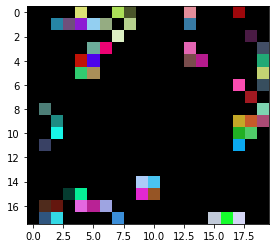

74


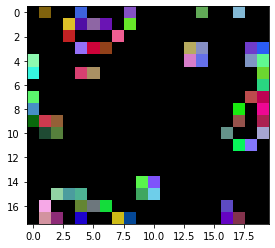

75


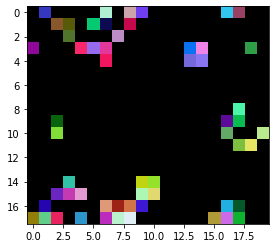

76


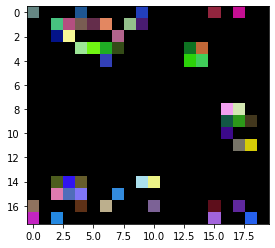

77


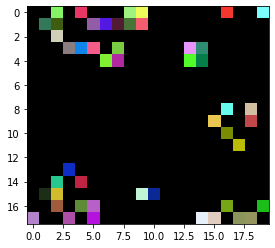

78


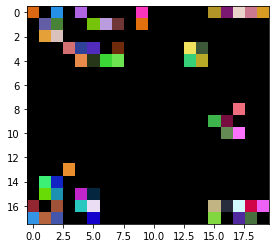

79


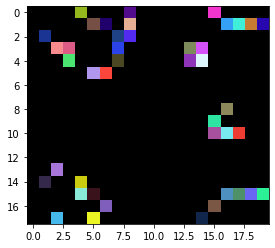

80


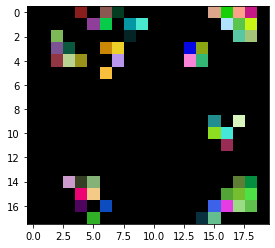

81


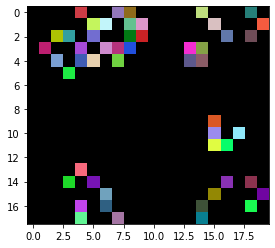

82


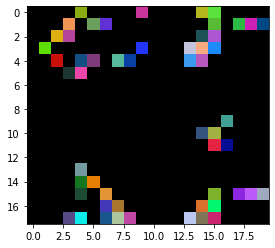

83


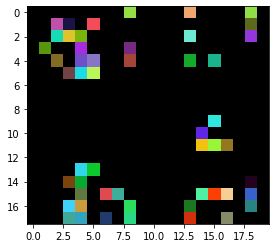

84


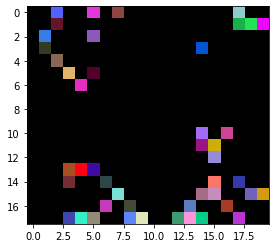

85


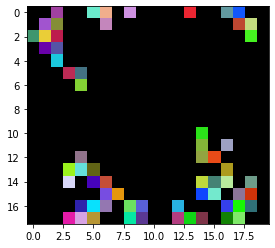

86


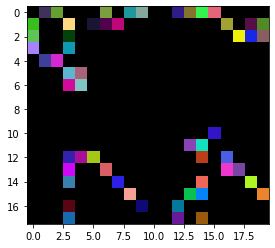

87


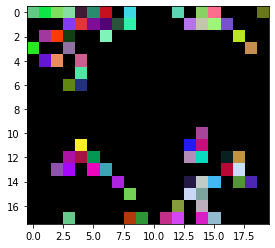

88


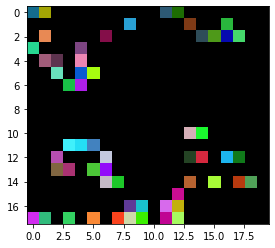

89


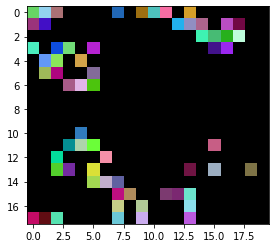

90


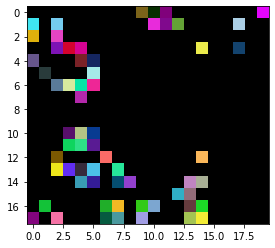

91


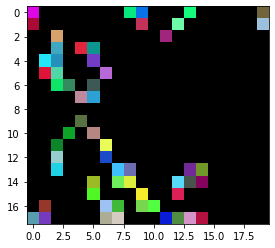

92


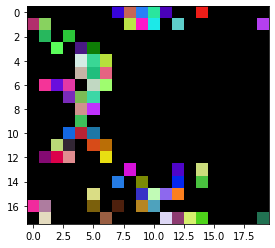

93


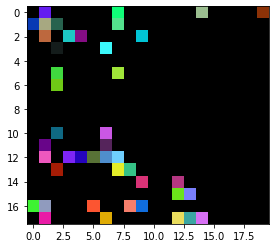

94


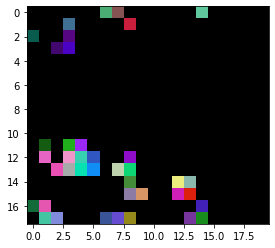

95


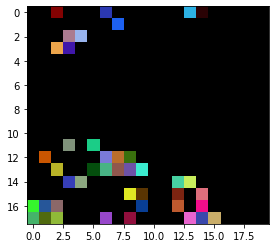

96


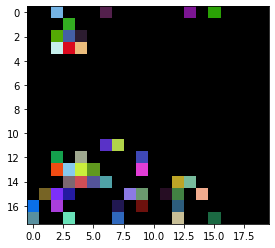

97


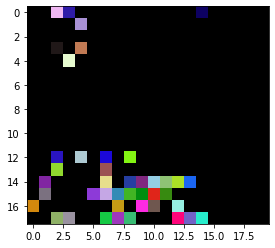

98


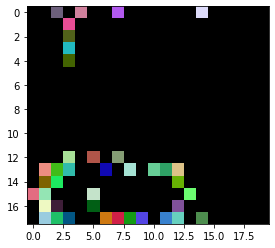

99


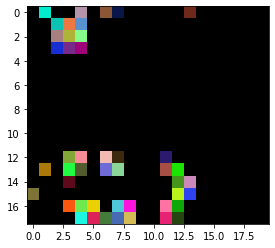

100


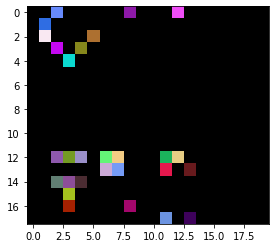

101


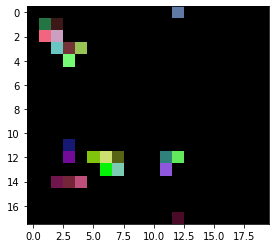

102


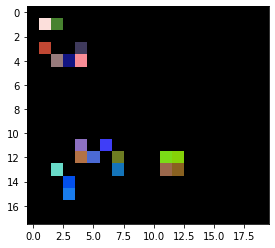

103


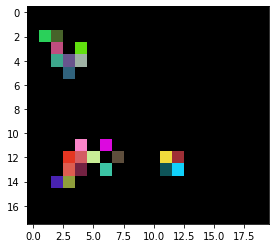

104


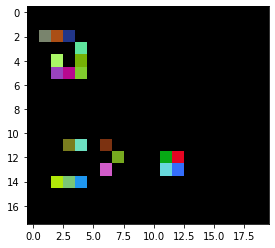

105


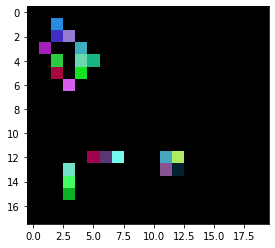

106


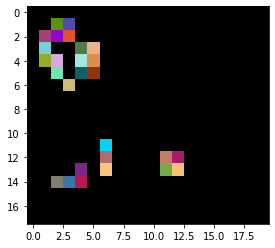

107


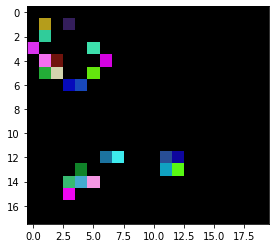

108


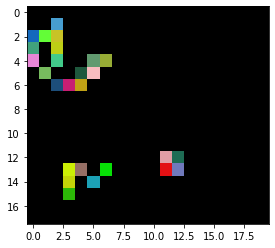

109


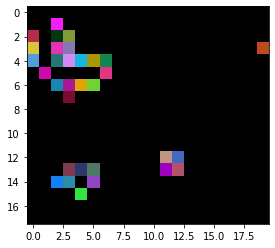

110


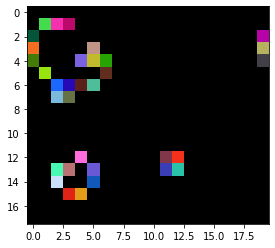

111


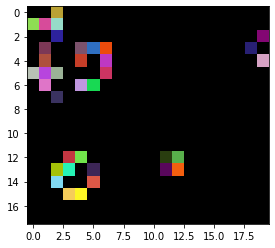

112


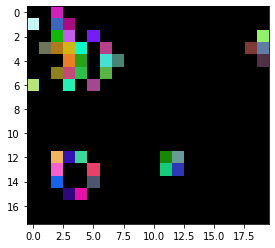

113


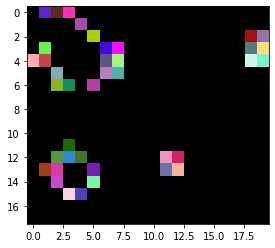

114


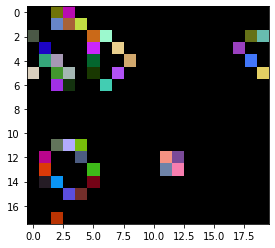

115


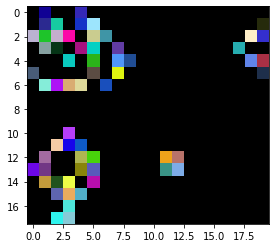

116


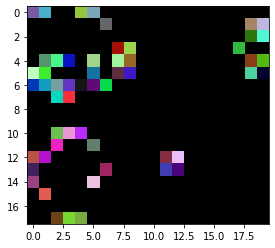

117


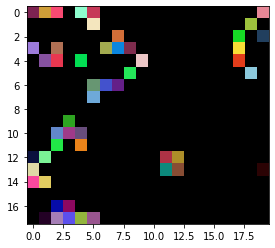

118


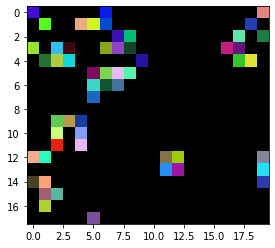

119


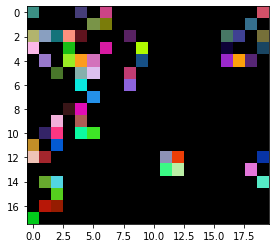

120


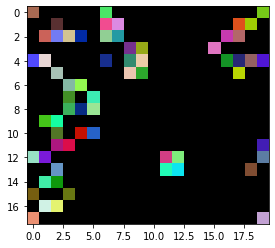

121


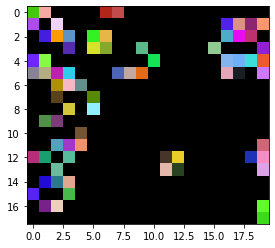

122


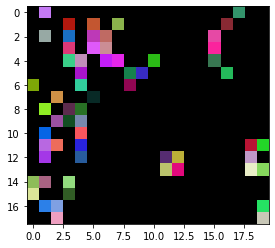

123


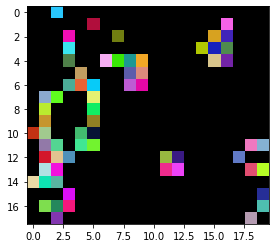

124


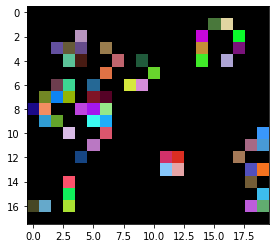

125


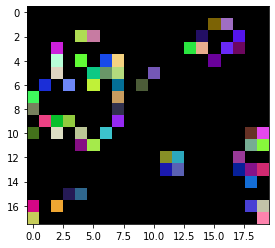

126


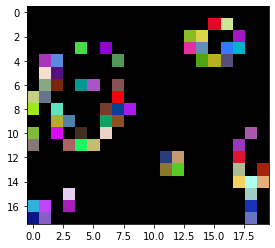

127


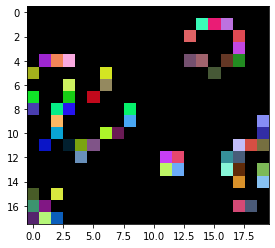

128


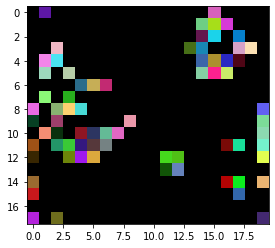

129


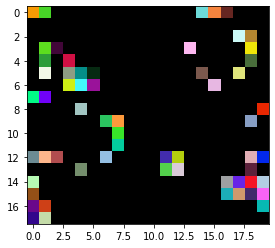

130


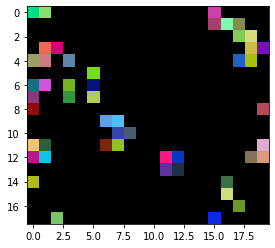

131


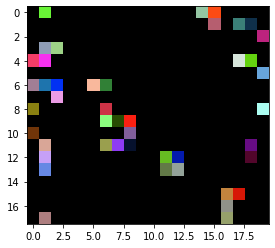

132


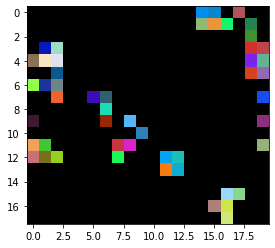

133


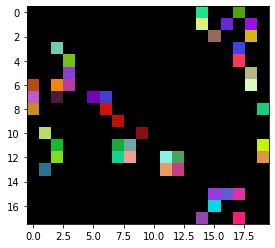

134


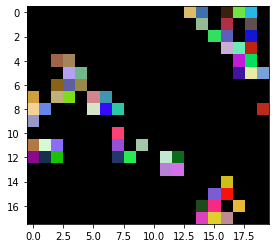

135


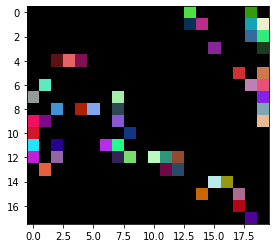

136


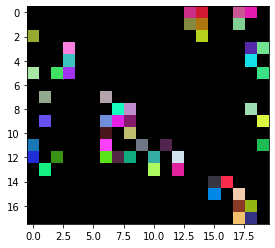

137


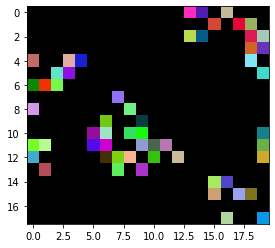

138


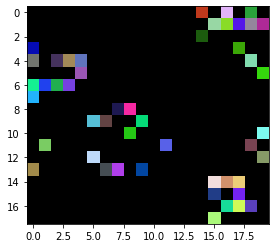

139


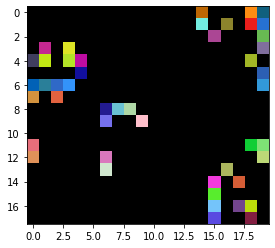

140


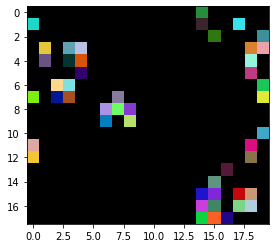

141


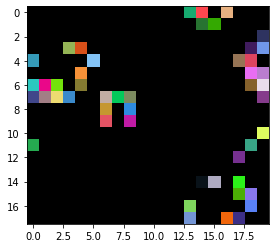

142


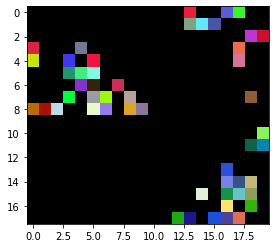

143


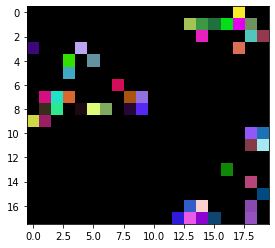

144


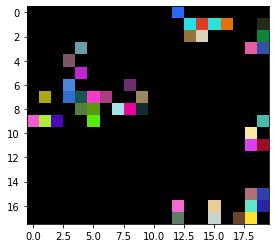

145


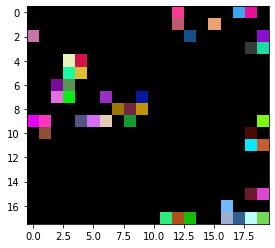

146


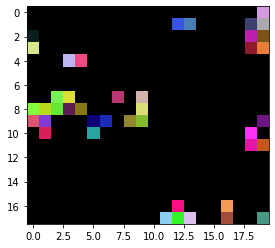

147


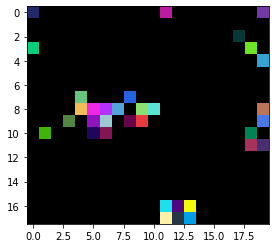

148


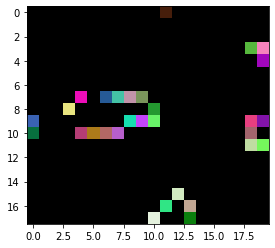

149


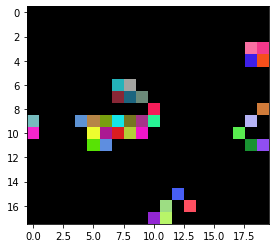

150


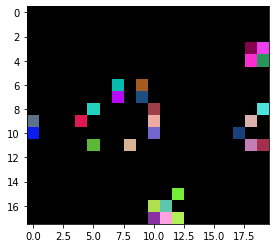

151


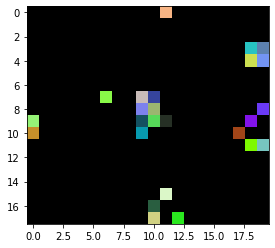

152


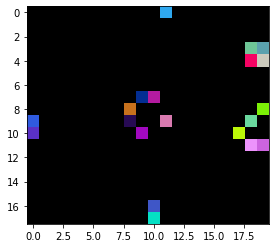

153


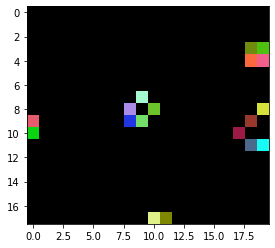

154


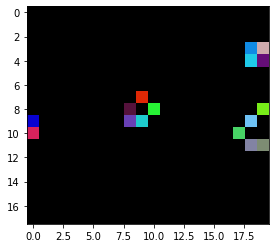

155


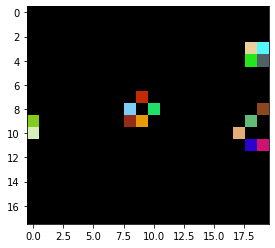

156


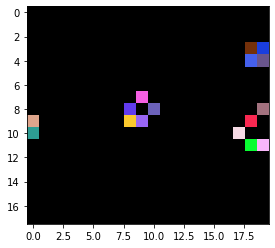

157


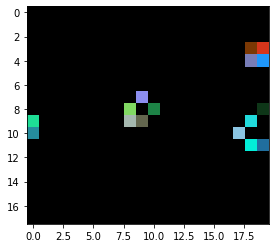

158


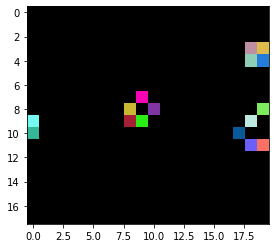

159


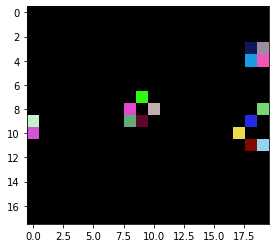

160


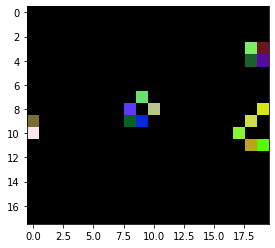

161


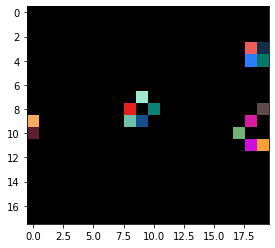

162


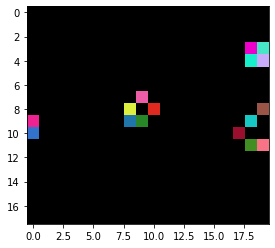

163


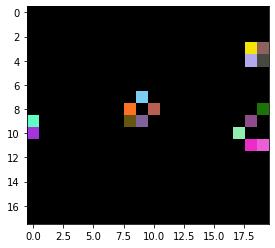

164


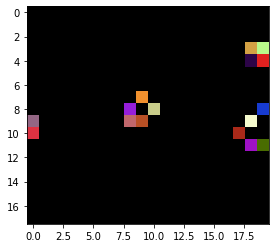

165


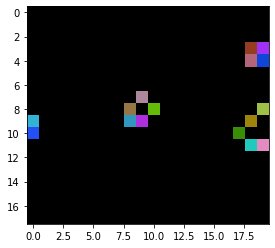

166


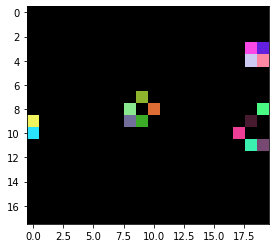

167


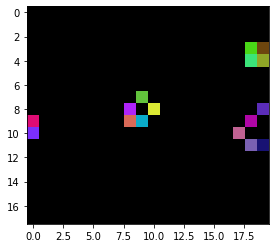

168


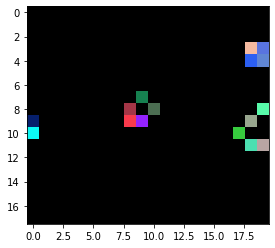

169


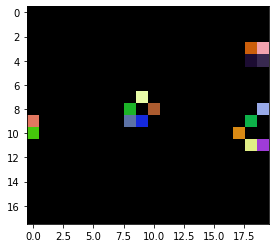

170


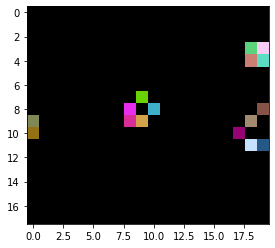

171


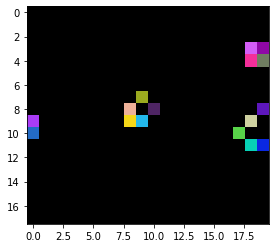

172


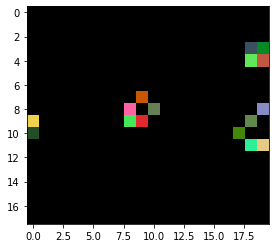

173


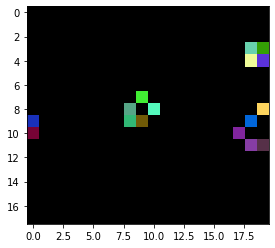

174


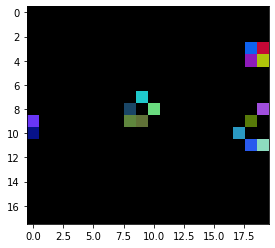

175


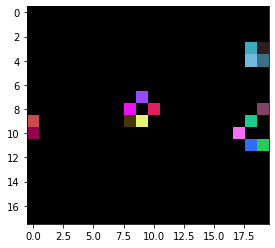

176


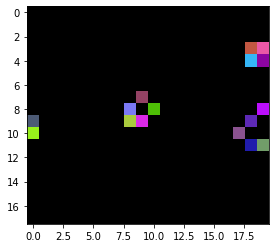

177


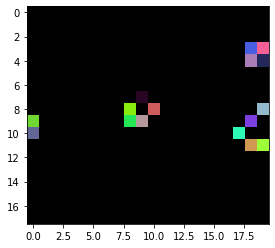

178


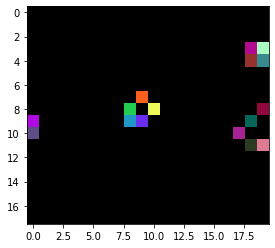

179


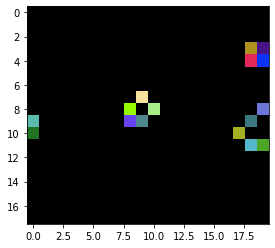

180


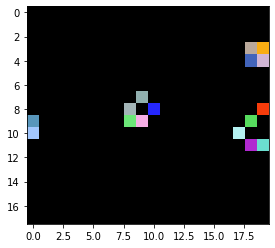

181


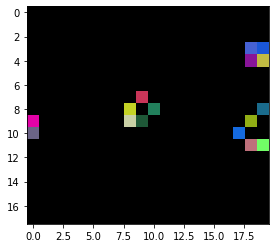

182


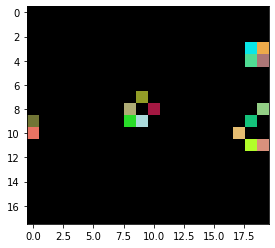

183


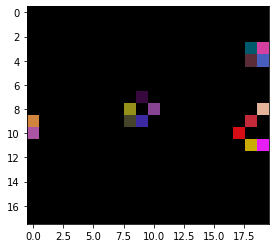

184


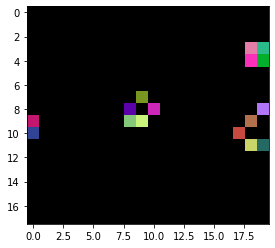

185


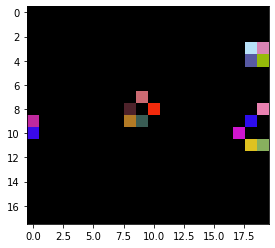

186


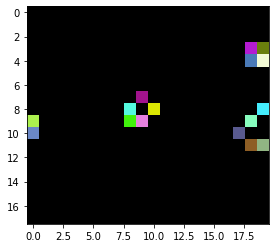

187


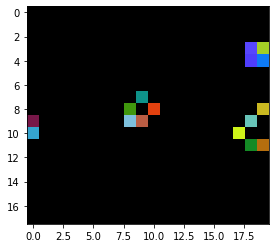

188


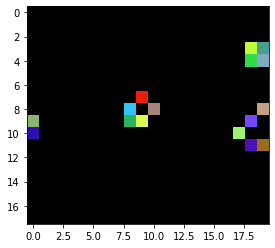

189


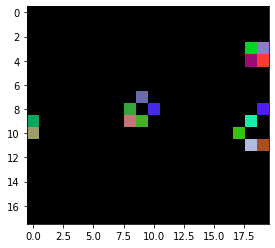

190


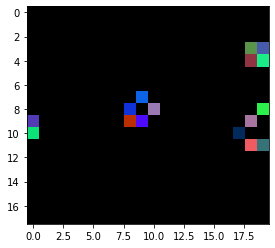

191


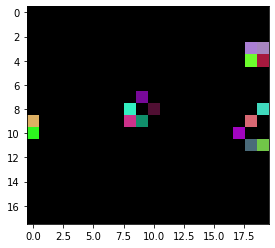

192


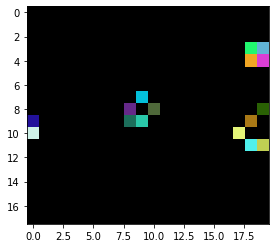

193


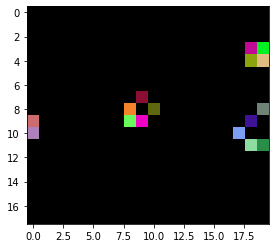

194


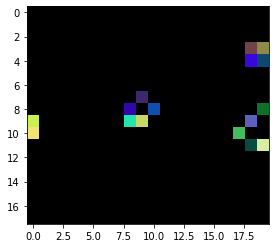

195


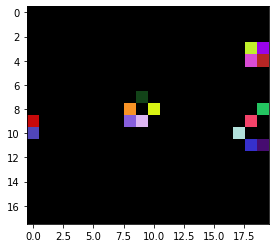

196


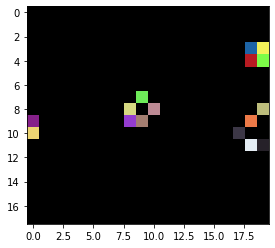

197


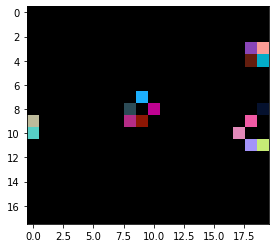

198


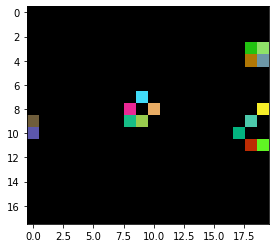

199


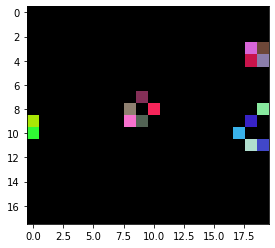

In [16]:
#Third Initial condition

field_x = np.random.randint(15, 30)
field_y = np.random.randint(19, 37)

field_random_color = np.zeros((field_x,field_y, 3), 'int')
live_30_pers = int(285*0.3)

random_x_ind = np.random.randint(0, field_random_color.shape[0], live_30_pers)
random_y_ind = np.random.randint(0, field_random_color.shape[1], live_30_pers)

for i in range(live_30_pers):
    field_random_color[random_x_ind[i],random_y_ind[i]] = [np.random.randint(1,255),np.random.randint(1,255),
                                                    np.random.randint(1,255)]

n_of_the_living_cells_color, time_color, list_to_gif_color = logic_and_plotting_color(field_random_color)

### 2. Provide a parallel implementation

### 3. Your parallel implementation runs for any number of MPI processors, regardless of the number of cells

### 4. Run the game with the "Gosper's glider gun" initial condition

In [6]:
# !pip install mpi4py

In [19]:
%%writefile Nazarova_Conways_Game_of_Life.py

import numpy as np
from mpi4py import MPI
import matplotlib.pyplot as plt

import numpy as np
from mpi4py import MPI
import matplotlib.pyplot as plt

# Initialization for parallelization
comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

# Функция, которая сдвигает позиции
def change_the_pos(i,j):
    array_of_neigbors = np.array([field[i-1,j], field[i-1,j-1], field[i-1,j+1], field[i+1,j], field[i+1,j-1], 
                             field[i+1,j+1], field[i,j-1], field[i,j+1]])
    
    sum_of_neigbors = sum(array_of_neigbors)
    
    if field[i,j] == 1:
        ##Любая живая клетка с менее чем двумя живыми соседями умирает, как если бы она была недостаточной
        ##Любая живая клетка с более чем тремя живыми соседями умирает, как будто от перенаселения
        if sum_of_neigbors < 2 or sum_of_neigbors > 3:
            pass

        ##Любая живая клетка с двумя или тремя живыми соседями доживает до следующего поколения
        elif sum_of_neigbors == 2 or sum_of_neigbors == 3:
            blank[i,j] = 1

    ##Любая мертвая клетка с ровно тремя живыми соседями становится живой клеткой, 
    #как бы в результате размножения
    if field[i,j] == 0 and sum_of_neigbors == 3:
        blank[i,j] = 1

glider_gun =\
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

field = np.zeros((50, 70))
field[1:10,1:37] = glider_gun

n = field.shape[0]

distr = n//(size)
list_of_distr = list(range(0, n+1, distr))
if list_of_distr[-1] != n:
    list_of_distr[-1] = n
    
list_to_send = []
for i in range(len(list_of_distr)-1):
    list_to_send.append([list_of_distr[i],list_of_distr[i+1]])
    
list_to_send = list_to_send[rank]
print(rank,list_to_send)


for number_of_iter in range(100):
    if rank == (size-1):
        blank = np.zeros((field.shape[0], field.shape[1]))

        for i in range(list_to_send[0], list_to_send[1]-1):
            for j in range(0, blank.shape[1]-1):
                ##check 8 neigbors without borders 
                change_the_pos(i,j)

        #bottom right corner
        change_the_pos(-1,-1)

        #bottom
        for i in range(list_to_send[0]-1, list_to_send[1]):
            for j in range(0, blank.shape[1]-1):
                change_the_pos(-1,j)

        #right
        for j in range(blank.shape[1]-1, blank.shape[1]):
            for i in range(list_to_send[0], list_to_send[1]-1):
                change_the_pos(i,-1)


        blank = blank[list_to_send[0]:list_to_send[1], :]


    else:
        blank = np.zeros((field.shape[0], field.shape[1]))

        # print(blank.shape)

        for i in range(list_to_send[0], list_to_send[1]):
            for j in range(0, blank.shape[1]-1):
                ##check 8 neigbors without borders 
                change_the_pos(i,j)

        #right
        for j in range(blank.shape[1]-1, blank.shape[1]):
            for i in range(list_to_send[0], list_to_send[1]-1):
                change_the_pos(i,-1)

        blank = blank[list_to_send[0]:list_to_send[1], :]

    comm.Barrier()
    Shifted = comm.gather(blank.copy(), root=0)

    if rank == 0:
        Data = np.concatenate((Shifted[0], Shifted[1]), axis=0)

        for i in range(2,size):
            Data = np.concatenate((Data, Shifted[i]), axis=0)
            
        field = Data.copy()
        
        for i in range(1, size):
            comm.send(field, dest=i)
        
                  
    else:
        field = comm.recv(source=0)
        

    if rank==0:
        plt.title(f"{number_of_iter}")
        plt.imshow(field)
        plt.show()


Overwriting Nazarova_Conways_Game_of_Life.py


In [8]:
# !mpirun --allow-run-as-root -np 3 python3 Nazarova_Conways_Game_of_Life.py

### 6. Plot the number of the living cells vs time for the three initial conditions above 

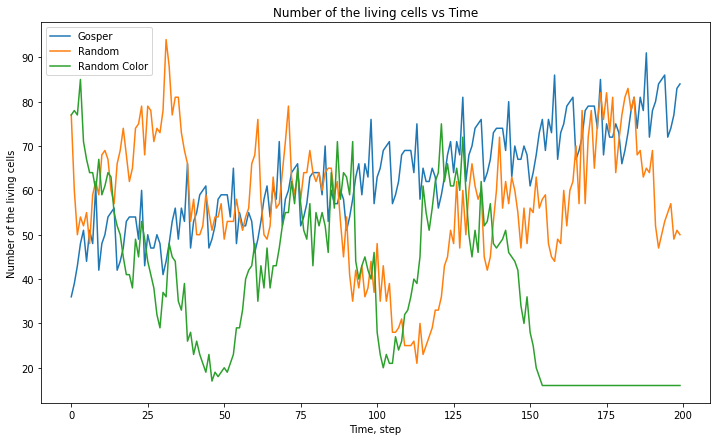

In [17]:
plt.figure(figsize=(12,7))
plt.title('Number of the living cells vs Time')

plt.plot(Gosper_time, Gosper_n_of_the_living_cells)
plt.plot(Random_time, Random_n_of_the_living_cells)
plt.plot(time_color, n_of_the_living_cells_color)
plt.legend(['Gosper', 'Random', 'Random Color'])
plt.xlabel('Time, step')
plt.ylabel('Number of the living cells')

plt.show()

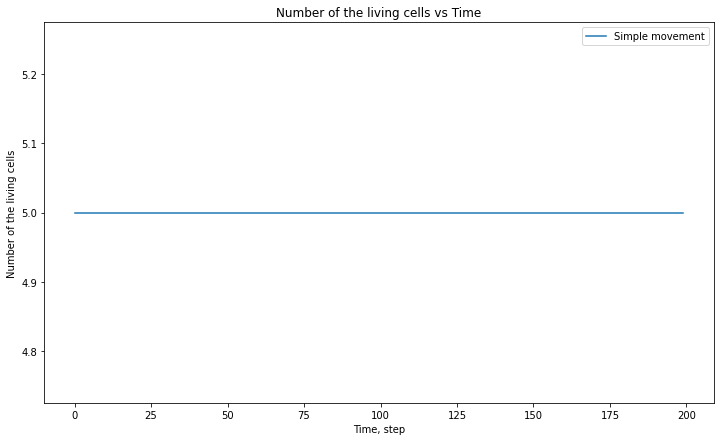

In [10]:
plt.figure(figsize=(12,7))
plt.title('Number of the living cells vs Time')

plt.plot(Simple_time, Simple_n_of_the_living_cells)
plt.legend(['Simple movement'])
plt.xlabel('Time, step')
plt.ylabel('Number of the living cells')

plt.show()

### Gif saving

In [13]:
# def save_gif(list_of_img):
    
#     gif = list_of_img

#     fig = plt.figure(figsize=(10, 8))
#     camera = Camera(fig)
#     ax = fig.add_subplot(1,1,1)

#     n = np.linspace(0, 1, 100)

#     for i in range(len(gif)):


#         ax.imshow(gif[i])

#         camera.snap()


#     animation = camera.animate()
#     animation.save('Gosper.gif', writer = 'pillow', fps = 7)
#     print("You saved the gif")

You saved the gif


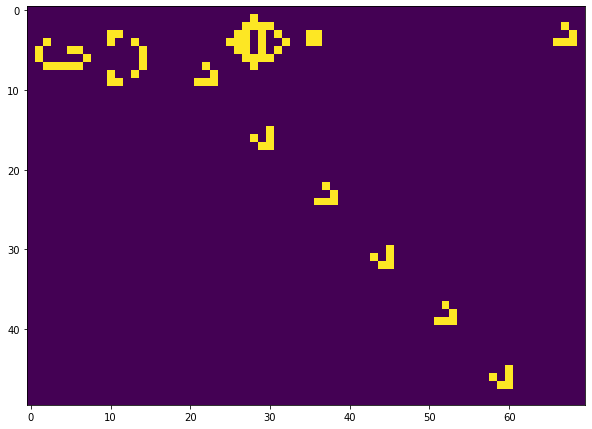

In [14]:
# import matplotlib.animation as animation
# from celluloid import Camera
# save_gif(Gosper_list_to_gif)